<center>

# **_Analyzing and Forecasting Restaurant Inspection Grades in NYC_**

</center>

<center>

# **DAV**
# **Data Science**  
# **Yeshiva University**
### *Ansuman Patnaik*

</center>

# **Abstract**

The project analyzed restaurant inspection grades in New York City by integrating inspection results with business acceleration data to identify patterns, determine factors influencing compliance, and develop predictive models. Initial data preprocessing involved removing outliers, handling missing values, and cleaning data for consistency. Exploratory data analysis (EDA) revealed key trends, such as seasonal variations in inspection scores and differences among boroughs. After merging the datasets, the analysis focused on business characteristics, such as sector, cuisine type, and opening date, to examine their impact on inspection outcomes.

Feature engineering and principal component analysis (PCA) helped identify the most significant features for predicting inspection grades. Among the machine learning models evaluated, the Random Forest classifier demonstrated the highest accuracy, achieving 99.79% after hyperparameter tuning. Other models, including Decision Tree, Logistic Regression, Support Vector Machine, and XGBoost, were also assessed, with varying levels of success.

The use of LIME (Local Interpretable Model-agnostic Explanations) provided insights into the specific features driving model predictions, enhancing interpretability. Time series forecasting with ARIMA indicated a gradual decline in inspection scores over the next 12 months, suggesting that proactive measures might be required to address potential compliance issues.

The project's results offer practical implications for regulatory compliance, resource allocation, and business development in the restaurant sector. The high accuracy of the Random Forest classifier and insights gained from LIME and ARIMA forecasting can guide future strategies to maintain public health standards and support the success of restaurants in New York City.

## **Introduction**
Ensuring public health and safety is a critical responsibility for city governments, especially in densely populated areas like New York City. One of the key measures to safeguard public health is through the regular inspection of restaurants and food establishments to ensure compliance with health and safety regulations. The NYC Department of Health and Mental Hygiene (DOHMH) conducts regular inspections of restaurants to assess their adherence to these regulations, ultimately assigning them a grade that reflects their compliance. This grade is made publicly available, impacting customer perception and business success.
Given the significant impact of these inspection grades, this project aims to analyze the NYC restaurant inspection data and business acceleration data to understand the factors that influence inspection grades, identify patterns, and even predict future grades. The ultimate goal is to derive insights that can help restaurants improve their compliance, streamline operations, and enhance customer trust.

**Objective**: Analyze NYC restaurant inspection data and business acceleration data to understand factors affecting inspection grades.

**Key Context**: NYC Department of Health and Mental Hygiene (DOHMH) assigns grades to restaurants based on health and safety inspections. These grades influence public perception and business success.

**Goals**:
  - Identify patterns and trends in inspection data.
  - Determine factors influencing restaurant inspection grades.
  - Develop predictive models for forecasting future inspection grades.

**Business Impact**:
  - Insights can help restaurants improve compliance and streamline operations.
  - Publicly available grades affect customer trust and business reputation.
  - Results may guide regulatory bodies and business stakeholders in decision-making and strategy.

### **Step-by-Step Approach**

*   Data Collection and loading
*   Data Preprocessing for Inspection Dataset
*   Data Preprocessing for Business Acceleration Dataset
*   Exploratory Data Analysis for Inspection dataset
*   Exploratory Data Analysis for Business Acceleration dataset
*   Post Data prepartion EDA
*   Merging both Datasets
*   Time Series Analysis of Inspection Data
*   Feature Engineering
*   Important features for each components
*   Model Construction & Evaluation
*   Model comparision and Selection
*   Hyperparameter tuning
*   Model interpretation using LIME
*   Conclusion
*   Overall Observation

## **Data Collection and Loading**

In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import lime
import lime.lime_tabular

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from prettytable import PrettyTable
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

In [ ]:
# URLs for the datasets on GitHub
url_data1 = 'https://raw.githubusercontent.com/Ansuman21/Data-Science-Final-Project/main/DOHMH_New_York_City_Restaurant_Inspection_Results.csv'
url_data2 = 'https://raw.githubusercontent.com/Ansuman21/Data-Science-Final-Project/main/NYC_Business_Acceleration_Businesses_Served_and_Jobs_Created_20240312.csv'

# Load the datasets
df_inspection = pd.read_csv(url_data1)
df_business_acceleration = pd.read_csv(url_data2)

### **Inference**
The inspection dataset and business acceleration dataset from GitHub were successfully loaded into dataframes. This provided the necessary data to analyze New York City restaurant inspections and business acceleration trends. The data included detailed information about inspection scores, grades, and business characteristics, forming the basis for further analysis.

In [ ]:
# View the dataset
df_inspection.head().T

,0,1,2,3,4
CAMIS,50122847,50146208,50146781,50111463,50148270
DBA,YE'S APOTHECARY,JAYA DAY,NaN,Taco Mahal,NATURAL CARIBBEAN
BORO,Manhattan,Queens,Staten Island,Manhattan,Brooklyn
BUILDING,119,160-09,3936,653,2123
STREET,ORCHARD STREET,NORTHERN BOULEVARD,AMBOY ROAD,9 AVENUE,CATON AVENUE
ZIPCODE,10002.0,11358.0,10308.0,10036.0,11226.0
PHONE,6469156806,7189614444,3475609318,2019258420,5164482153
CUISINE DESCRIPTION,NaN,NaN,NaN,NaN,NaN
INSPECTION DATE,01/01/1900,01/01/1900,01/01/1900,01/01/1900,01/01/1900
ACTION,NaN,NaN,NaN,NaN,NaN


### **Inference**
Viewing the transposed head of the inspection dataset revealed a glimpse of the first few records, including information about the restaurant name, borough, inspection date, violation details, and grade. This overview provided a foundational understanding of the data structure and the key features available for analysis.

In [ ]:
# View the dataset
df_business_acceleration.head().T

,0,1,2,3,4
DBA,Orchard Grocer Inc,Palermo Salumeria,Foragers City Grocers,Cultural Xchange,ST. JOHNS CHURCH
Establishment Street,78 Orchard St,33-35 Francis Lewis Blvd,300 West 22nd Street,35 Lafayette Ave,90-37 213 Street
Establishment Zip,10002,11358,10011,11217,11428
Establishment Borough,Manhattan,Queens,Manhattan,Brooklyn,Queens
Business Sector,Accommodations and Food,NaN,NaN,NaN,NaN
Establishment Category,Restaurants and Other Eating Places,NaN,NaN,NaN,NaN
Type of Cuisine,NaN,NaN,NaN,NaN,NaN
Number Of Employees,NaN,NaN,NaN,3,NaN
Actual Opening Date,02/01/2017,NaN,NaN,NaN,NaN


### **Inference**
The transposed head of the business acceleration dataset displayed initial rows with information on business names, locations, zip codes, and the number of employees. This initial glimpse offered insights into the business sector, establishment categories, and related data points, which were essential for further exploration and analysis.

In [ ]:
# Check the number of unique values for each column
print("\nUnique Values in Inspection Data:")
print(df_inspection.nunique())

print("\nUnique Values in Business Acceleration Data:")
print(df_business_acceleration.nunique())


Unique Values in Inspection Data:
CAMIS                    28784
DBA                      22483
BORO                         6
BUILDING                  7541
STREET                    2398
ZIPCODE                    224
PHONE                    26006
CUISINE DESCRIPTION         89
INSPECTION DATE           1703
ACTION                       5
VIOLATION CODE             143
VIOLATION DESCRIPTION      221
CRITICAL FLAG                3
SCORE                      130
GRADE                        6
GRADE DATE                1476
RECORD DATE                  1
INSPECTION TYPE             32
Latitude                 23362
Longitude                23362
Community Board             69
Council District            51
Census Tract              1183
BIN                      20197
BBL                      19890
NTA                        193
Location Point1              0
dtype: int64

Unique Values in Business Acceleration Data:
DBA                       4938
Establishment Street      5050
Establi

### **Inference**
The unique value counts indicated the breadth and variety within the datasets. The inspection data revealed a high number of unique business names, indicating a diverse range of establishments in NYC. The business acceleration data showed significant variability in business sectors, establishment categories, and employee numbers, suggesting a rich mix of businesses contributing to the city's economy. The counts also highlighted the potential for analysis across various features, with a substantial number of distinct values in "ZIPCODE," "CUISINE DESCRIPTION," and "INSPECTION DATE" among others, paving the way for meaningful insights into business operations and public health metrics.

## **Data Preprocessing for Restaurant Inspection Data**

In [ ]:
# EDA for Dataset 1 (Restaurant Inspection Data)
print("Exploratory Data Analysis for Dataset 1 (Restaurant Inspection Data)")

# Basic information
print("Shape of the dataset:")
print(df_inspection.shape)

print("Data Types:")
print(df_inspection.dtypes)

Exploratory Data Analysis for Dataset 1 (Restaurant Inspection Data)
Shape of the dataset:
(219276, 27)
Data Types:
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location Point1          f

### **Inference**
The exploratory data analysis of the restaurant inspection dataset indicated that it contained 219,276 records with 27 columns. The data types showed a mix of categorical and numerical features, with many columns containing object data types, suggesting the need for data preprocessing and transformation to ensure consistency and facilitate analysis.

In [ ]:
# Missing values
print("Percentage of Missing Values:")
print((df_inspection.isnull().sum() / df_inspection.shape[0]) * 100)

Percentage of Missing Values:
CAMIS                      0.000000
DBA                        0.257666
BORO                       0.000000
BUILDING                   0.199748
STREET                     0.004104
ZIPCODE                    1.252303
PHONE                      0.000912
CUISINE DESCRIPTION        1.056659
INSPECTION DATE            0.000000
ACTION                     1.056659
VIOLATION CODE             1.574728
VIOLATION DESCRIPTION      1.574728
CRITICAL FLAG              0.000000
SCORE                      4.795782
GRADE                     51.087670
GRADE DATE                55.153779
RECORD DATE                0.000000
INSPECTION TYPE            1.056659
Latitude                   0.129517
Longitude                  0.129517
Community Board            1.551925
Council District           1.549645
Census Tract               1.549645
BIN                        2.028494
BBL                        0.303727
NTA                        1.551925
Location Point1          100.00000

### **Inference**
The inspection data exhibited various degrees of missing values across its columns, with some columns like GRADE DATE and GRADE having over 50% missing data. Additionally, the Location Point1 column had a complete 100% missing value rate, indicating it might require removal. Missing data in key columns such as SCORE, ZIPCODE, VIOLATION CODE, and VIOLATION DESCRIPTION suggested that imputation or other preprocessing techniques would be necessary to ensure data completeness and reliability.

In [ ]:
# Impute missing values in categorical columns with mode (most frequent value)
categorical_cols = ['DBA', 'BORO', 'CUISINE DESCRIPTION', 'GRADE', 'ACTION', 'INSPECTION TYPE']
for col in categorical_cols:
    df_inspection[col].fillna(df_inspection[col].mode()[0], inplace=True)

# Impute missing values in numerical columns with mean/median or a specific value
df_inspection['ZIPCODE'].fillna(df_inspection['ZIPCODE'].median(), inplace=True)
df_inspection['SCORE'].fillna(df_inspection['SCORE'].mean(), inplace=True)

# Custom imputation for "GRADE DATE" with forward fill
df_inspection['GRADE DATE'] = pd.to_datetime(df_inspection['GRADE DATE'], errors='coerce')
df_inspection['GRADE DATE'].fillna(method='ffill', inplace=True)

# Creating indicator columns for critical missing data
df_inspection['Grade_Missing'] = df_inspection['GRADE'].isnull().astype(int)

# Removing columns with 100% missing data
df_inspection.drop(['Location Point1'], axis=1, inplace=True)

print("Missing Values after Imputation:")
print((df_inspection.isnull().sum() / df_inspection.shape[0]) * 100)

Missing Values after Imputation:
CAMIS                    0.000000
DBA                      0.000000
BORO                     0.000000
BUILDING                 0.199748
STREET                   0.004104
ZIPCODE                  0.000000
PHONE                    0.000912
CUISINE DESCRIPTION      0.000000
INSPECTION DATE          0.000000
ACTION                   0.000000
VIOLATION CODE           1.574728
VIOLATION DESCRIPTION    1.574728
CRITICAL FLAG            0.000000
SCORE                    0.000000
GRADE                    0.000000
GRADE DATE               0.003648
RECORD DATE              0.000000
INSPECTION TYPE          0.000000
Latitude                 0.129517
Longitude                0.129517
Community Board          1.551925
Council District         1.549645
Census Tract             1.549645
BIN                      2.028494
BBL                      0.303727
NTA                      1.551925
Grade_Missing            0.000000
dtype: float64


### **Inference**
After applying imputation methods, the percentage of missing values in most columns was significantly reduced. The categorical columns, such as DBA, ACTION, GRADE, and CUISINE DESCRIPTION, had no missing values. However, some columns like VIOLATION CODE and VIOLATION DESCRIPTION still had a small percentage of missing data, indicating room for further data cleaning.

In [ ]:
# Check for Duplicates
print("Number of Duplicate Rows:")
print(df_inspection.duplicated().sum())

Number of Duplicate Rows:
0


### **Inference**
The dataset was checked for duplicate rows, and it was found that there were no duplicate records, indicating that the data was clean in terms of redundancy. This ensured that further analysis and modeling would not be affected by repeat or identical entries.

In [ ]:
# Unique Values for Categorical Columns
print("Unique Values for Categorical Columns:")
print(df_inspection.nunique())

Unique Values for Categorical Columns:
CAMIS                    28784
DBA                      22483
BORO                         6
BUILDING                  7541
STREET                    2398
ZIPCODE                    224
PHONE                    26006
CUISINE DESCRIPTION         89
INSPECTION DATE           1703
ACTION                       5
VIOLATION CODE             143
VIOLATION DESCRIPTION      221
CRITICAL FLAG                3
SCORE                      131
GRADE                        6
GRADE DATE                1476
RECORD DATE                  1
INSPECTION TYPE             32
Latitude                 23362
Longitude                23362
Community Board             69
Council District            51
Census Tract              1183
BIN                      20197
BBL                      19890
NTA                        193
Grade_Missing                1
dtype: int64


### **Inference**
The data contained a variety of unique values across its categorical columns. 'CAMIS', a unique identifier, had 28,784 different values, indicating a large number of records. 'DBA' (Doing Business As) had 22,483 unique values, suggesting a diverse set of businesses. Other columns, like 'BORO', had only six unique values, reflecting the limited number of boroughs in New York City. These variations in unique counts across columns indicated a rich dataset with both broad and narrow scopes, which could impact the modeling approach and analysis.

In [ ]:
# Convert categorical columns to 'category' data type
categorical_cols = ['BORO', 'GRADE', 'CRITICAL FLAG', 'ACTION', 'INSPECTION TYPE']
for col in categorical_cols:
    df_inspection[col] = df_inspection[col].astype('category')

# One-hot encode categorical columns for use in machine learning
df_encoded = pd.get_dummies(df_inspection, columns=categorical_cols, drop_first=True)

# Extract features from date columns
df_inspection['INSPECTION DATE'] = pd.to_datetime(df_inspection['INSPECTION DATE'], errors='coerce')
df_inspection['INSPECTION_YEAR'] = df_inspection['INSPECTION DATE'].dt.year
df_inspection['INSPECTION_MONTH'] = df_inspection['INSPECTION DATE'].dt.month

# Process 'Latitude' and 'Longitude' for geospatial analysis or clustering (if needed)
df_geo = df_inspection.groupby('BORO')[['Latitude', 'Longitude']].mean().reset_index()

# Display the unique counts for each column after preprocessing
print("Unique Values After Preprocessing:")
print(df_encoded.nunique())

Unique Values After Preprocessing:
CAMIS                                                       28784
DBA                                                         22483
BUILDING                                                     7541
STREET                                                       2398
ZIPCODE                                                       224
                                                            ...  
INSPECTION TYPE_Smoke-Free Air Act / Re-inspection              2
INSPECTION TYPE_Trans Fat / Compliance Inspection               2
INSPECTION TYPE_Trans Fat / Initial Inspection                  2
INSPECTION TYPE_Trans Fat / Re-inspection                       2
INSPECTION TYPE_Trans Fat / Second Compliance Inspection        2
Length: 69, dtype: int64


### **Inference**
After converting key columns to the 'category' data type and applying one-hot encoding for machine learning, the preprocessed data exhibited notable changes in unique counts. The 'INSPECTION YEAR' and 'INSPECTION MONTH' features were derived from 'INSPECTION DATE', providing useful chronological information. The dataset included a wide range of one-hot encoded inspection types, indicating diverse inspection categories. Additionally, the geospatial features ('Latitude' and 'Longitude') were processed, with 'BORO' providing an avenue for location-based analysis. The resulting data structure indicated a rich set of features for further analysis and modeling.

In [ ]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
df_inspection.describe().T

Summary Statistics for Numerical Columns:


,count,mean,min,25%,50%,75%,max,std
CAMIS,219276.0,47609810.258054,30075445.0,41658037.0,50070734.0,50109164.0,50148454.0,4003126.824481
ZIPCODE,219276.0,10712.855497,8512.0,10023.0,11101.0,11230.0,12345.0,591.952485
INSPECTION DATE,219276,2021-06-05 07:29:03.359053824,1900-01-01 00:00:00,2022-03-31 00:00:00,2022-11-18 00:00:00,2023-06-06 00:00:00,2024-03-08 00:00:00,NaN
SCORE,219276.0,23.092043,0.0,12.0,20.0,30.0,168.0,17.18326
GRADE DATE,219268,2022-09-13 23:20:39.710308608,2015-09-24 00:00:00,2022-03-30 00:00:00,2022-12-07 00:00:00,2023-06-04 00:00:00,2024-03-08 00:00:00,NaN
Latitude,218992.0,40.217029,0.0,40.681921,40.729608,40.760733,40.912822,4.524956
Longitude,218992.0,-73.017761,-74.249101,-73.989129,-73.957053,-73.896761,0.0,8.214901
Community Board,215873.0,254.636652,101.0,106.0,302.0,401.0,595.0,129.94297
Council District,215878.0,20.930289,1.0,4.0,20.0,35.0,51.0,15.897771
Census Tract,215878.0,29972.824345,100.0,8000.0,17200.0,42500.0,162100.0,31516.84662


### **Inference**
The statistical summary of the data revealed key insights into the dataset. 'SCORE' had a wide range with a maximum of 168, suggesting varying inspection outcomes. 'INSPECTION DATE' and 'GRADE DATE' spanned a broad timeline, with missing values detected. Geographic features like 'Latitude' and 'Longitude' had expected means, but variable distributions, indicating a wide geographic coverage of the inspection data.

In [ ]:
# Check the column names
df_inspection.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Grade_Missing', 'INSPECTION_YEAR', 'INSPECTION_MONTH'],
      dtype='object')

### **Inference**
Here, we checked for the number of columns present in the inspection dataframe.

## **Data Preprocessing for Business Acceleration Dataset**

In [ ]:
# Basic Information
print("Shape of the dataset:")
print(df_business_acceleration.shape)

print("\nData Types:")
print("-----------")
print(df_business_acceleration.dtypes)

Shape of the dataset:
(5226, 9)

Data Types:
-----------
DBA                       object
Establishment Street      object
Establishment Zip         object
Establishment Borough     object
Business Sector           object
Establishment Category    object
Type of Cuisine           object
Number Of Employees       object
Actual Opening Date       object
dtype: object


### **Inference**
The dataset contained 5,226 records across nine features, all with object data types. This indicated that the dataset primarily consisted of categorical information. It included business details such as 'DBA', 'Establishment Street', and 'Type of Cuisine', as well as business-specific data like 'Number of Employees' and 'Actual Opening Date'.

In [ ]:
# Missing Values
print("Percentage of Missing Values:")
print((df_business_acceleration.isnull().sum() / df_business_acceleration.shape[0]) * 100)

Percentage of Missing Values:
DBA                        0.000000
Establishment Street       0.000000
Establishment Zip          0.114811
Establishment Borough      0.114811
Business Sector           23.899732
Establishment Category    25.583620
Type of Cuisine           39.590509
Number Of Employees       26.310754
Actual Opening Date        4.228856
dtype: float64


### **Inference**
The dataset had varying percentages of missing values across its columns. While 'DBA' and 'Establishment Street' had no missing data, other columns like 'Establishment Zip' and 'Establishment Borough' had a small percentage of missing values (0.11%). However, significant gaps were observed in 'Business Sector', 'Establishment Category', 'Number of Employees', and 'Type of Cuisine', with missing data percentages ranging from approximately 24% to 40%.

In [ ]:
# Convert ZIP codes to strings to avoid conversion errors
df_business_acceleration['Establishment Zip'] = df_business_acceleration['Establishment Zip'].astype(str)

# Clean the ZIP codes to extract the primary part (before any hyphens)
df_business_acceleration['Establishment Zip'] = df_business_acceleration['Establishment Zip'].str.split('-').str[0]

# Convert to numeric and find the most frequent ZIP code for imputation
df_business_acceleration['Establishment Zip'] = pd.to_numeric(df_business_acceleration['Establishment Zip'], errors='coerce')
most_common_zip = df_business_acceleration['Establishment Zip'].mode()[0]

# Fill missing ZIP codes with the most frequent one
df_business_acceleration['Establishment Zip'].fillna(most_common_zip, inplace=True)

# Fill missing values for categorical columns with mode
df_business_acceleration['Business Sector'].fillna(df_business_acceleration['Business Sector'].mode()[0], inplace=True)
df_business_acceleration['Establishment Category'].fillna(df_business_acceleration['Establishment Category'].mode()[0], inplace=True)

# Fill missing values for numerical columns with median
df_business_acceleration['Number Of Employees'] = pd.to_numeric(df_business_acceleration['Number Of Employees'], errors='coerce')
df_business_acceleration['Number Of Employees'].fillna(df_business_acceleration['Number Of Employees'].median(), inplace=True)

# Fill missing values for other critical columns
df_business_acceleration['Establishment Zip'].fillna(df_business_acceleration['Establishment Zip'].median(), inplace=True)
df_business_acceleration['Establishment Borough'].fillna(df_business_acceleration['Establishment Borough'].mode()[0], inplace=True)

# Handle missing values in date columns with forward fill
df_business_acceleration['Actual Opening Date'] = pd.to_datetime(df_business_acceleration['Actual Opening Date'], errors='coerce')
df_business_acceleration['Actual Opening Date'].fillna(method='ffill', inplace=True)

# Indicator for missing values in critical columns
df_business_acceleration['Type_of_Cuisine_Missing'] = df_business_acceleration['Type of Cuisine'].isnull().astype(int)

# Fill missing values in "Type of Cuisine" with the mode or a default value
most_common_cuisine = df_business_acceleration['Type of Cuisine'].mode()[0]
df_business_acceleration['Type of Cuisine'].fillna(most_common_cuisine, inplace=True)

# After handling missing values, check the new percentage of missing data
print("New Percentage of Missing Values:")
print((df_business_acceleration.isnull().sum() / df_business_acceleration.shape[0]) * 100)

New Percentage of Missing Values:
DBA                        0.0
Establishment Street       0.0
Establishment Zip          0.0
Establishment Borough      0.0
Business Sector            0.0
Establishment Category     0.0
Type of Cuisine            0.0
Number Of Employees        0.0
Actual Opening Date        0.0
Type_of_Cuisine_Missing    0.0
dtype: float64


After addressing missing values, the dataset's percentage of missing data across all columns was reduced to zero. The imputation process used various strategies, including mode-based filling for categorical data and median-based filling for numerical data. Additionally, forward filling was employed for date columns to ensure continuity. As a result, the dataset no longer contained any missing values across all its critical columns, making it ready for further analysis and modeling.

In [ ]:
# Check for Duplicates
print("Number of Duplicate Rows:")
print(df_business_acceleration.duplicated().sum())

Number of Duplicate Rows:
0


### **Inference**
The dataset for business acceleration was checked for duplicate rows, and none were found. This indicates that each record in the dataset was unique, with no repeated entries. This finding provided confidence that the dataset did not contain redundant information and was ready for further analysis and processing.

In [ ]:
# Unique Values for Categorical Columns
print("Unique Values for Categorical Columns:")
print(df_business_acceleration.nunique())

Unique Values for Categorical Columns:
DBA                        4938
Establishment Street       5050
Establishment Zip           297
Establishment Borough         7
Business Sector               9
Establishment Category       30
Type of Cuisine             330
Number Of Employees          86
Actual Opening Date        2137
Type_of_Cuisine_Missing       2
dtype: int64


### **Inference**
The analysis of unique values for categorical columns in the business acceleration dataset revealed that there were 4,938 unique business names (DBA), 5,050 unique establishment streets, and 297 unique ZIP codes. The data also contained 7 unique boroughs, 9 business sectors, 30 establishment categories, and 330 different types of cuisine. The presence of a wide variety of categorical values indicated a diverse range of businesses within the dataset.

In [ ]:
# Convert columns with limited unique values to 'category' data type
categorical_cols = ['Establishment Borough', 'Business Sector', 'Establishment Category']
for col in categorical_cols:
    df_business_acceleration[col] = df_business_acceleration[col].astype('category')

# One-hot encode categorical columns for use in machine learning
df_business_encoded = pd.get_dummies(df_business_acceleration, columns=categorical_cols, drop_first=True)

# Extract features from "Actual Opening Date"
df_business_acceleration['Actual Opening Date'] = pd.to_datetime(df_business_acceleration['Actual Opening Date'], errors='coerce')
df_business_acceleration['Opening Year'] = df_business_acceleration['Actual Opening Date'].dt.year
df_business_acceleration['Opening Month'] = df_business_acceleration['Actual Opening Date'].dt.month

# Binning "Number Of Employees" into ranges
df_business_acceleration['Employees Range'] = pd.cut(df_business_acceleration['Number Of Employees'], bins=[0, 10, 50, 100, 500], labels=['0-10', '11-50', '51-100', '101-500'])

# Display the unique counts for each column after preprocessing
print("Unique Values After Preprocessing:")
print(df_business_encoded.nunique())

Unique Values After Preprocessing:
DBA                                                                                  4938
Establishment Street                                                                 5050
Establishment Zip                                                                     297
Type of Cuisine                                                                       330
Number Of Employees                                                                    86
Actual Opening Date                                                                  2137
Type_of_Cuisine_Missing                                                                 2
Establishment Borough_Bronx                                                             2
Establishment Borough_Brooklyn                                                          2
Establishment Borough_Manhattan                                                         2
Establishment Borough_Other                                      

### **Inference**
After preprocessing the business acceleration dataset, there were 4,938 unique business names, 5,050 unique establishment streets, and 297 unique ZIP codes. In addition, 330 unique types of cuisine, 86 distinct values for the number of employees, and 2 unique categories indicating missing values in the "Type of Cuisine" column were observed. The dataset also had additional one-hot encoded categorical columns indicating establishments by borough, business sector, and establishment category, with values typically having 2 unique representations due to binary encoding.

In [ ]:
# Summary Statistics for Numeric Columns
print("Summary Statistics for Numeric Columns:")
df_business_acceleration.describe().T

Summary Statistics for Numeric Columns:


,count,mean,min,25%,50%,75%,max,std
Establishment Zip,5226.0,1611063.334099,1206.0,10023.0,11102.0,11225.0,116931512.0,12940191.633008
Number Of Employees,5226.0,12.331611,0.0,4.0,6.0,10.0,500.0,26.409851
Actual Opening Date,5226,2015-02-13 00:31:41.262916096,2005-01-01 00:00:00,2013-08-15 00:00:00,2015-04-13 12:00:00,2016-11-04 00:00:00,2019-08-08 00:00:00,NaN
Type_of_Cuisine_Missing,5226.0,0.395905,0.0,0.0,0.0,1.0,1.0,0.489091
Opening Year,5226.0,2014.618829,2005.0,2013.0,2015.0,2016.0,2019.0,2.100568
Opening Month,5226.0,6.555874,1.0,4.0,6.0,9.0,12.0,3.337368


### **Inference**
The establishment ZIP codes in the business acceleration dataset had a mean value of 1,611,063, with a minimum of 1,206 and a maximum of 116,931,512. The number of employees had a mean of 12.33, ranging from 0 to 500, with a standard deviation of 26.41. The actual opening date had a mean of February 13, 2015, with a minimum date of January 1, 2005, and a maximum of August 8, 2019. The average value for the 'Type_of_Cuisine_Missing' indicator was 0.40, while the opening year had a mean of 2014.62, with the opening month averaging 6.56.

In [ ]:
# Check the column names
df_business_acceleration.columns

Index(['DBA', 'Establishment Street', 'Establishment Zip',
       'Establishment Borough', 'Business Sector', 'Establishment Category',
       'Type of Cuisine', 'Number Of Employees', 'Actual Opening Date',
       'Type_of_Cuisine_Missing', 'Opening Year', 'Opening Month',
       'Employees Range'],
      dtype='object')

### **Inference**
Here, we checked for the columns that are left after preprocessing of business acceleration dataset.

## **Exploratory Data Analysis for Inspection data**

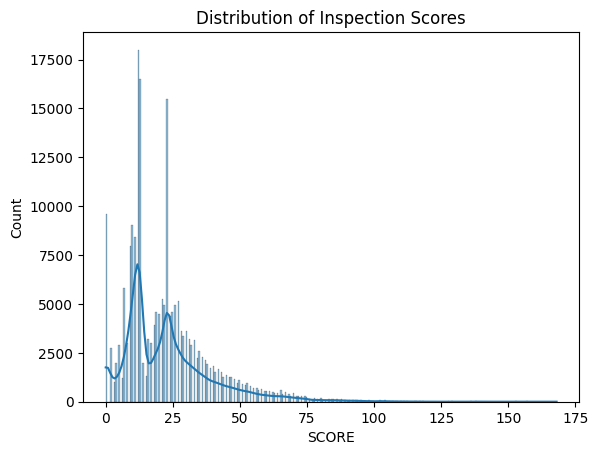

In [ ]:
# Histogram for SCORE
sns.histplot(data=df_inspection, x='SCORE', kde=True)
plt.title("Distribution of Inspection Scores")
plt.show()

### **Inference**
1. The inspection scores' distribution was skewed to the left, indicating that most scores were high, with a lower score tail.
2. The mode was above 90, suggesting that most inspections resulted in high scores.
3. Scores ranged from 0 to nearly 100, showing a significant spread and variability.
4. The presence of peaks at intervals, particularly around 100, hinted at potential scoring system characteristics or patterns in inspection outcomes.
5. The high concentration of scores near 90 suggested that most inspected entities performed well according to the criteria.
6. The lower count of scores near 0 might have indicated non-compliance cases, exceptional circumstances, or data errors.

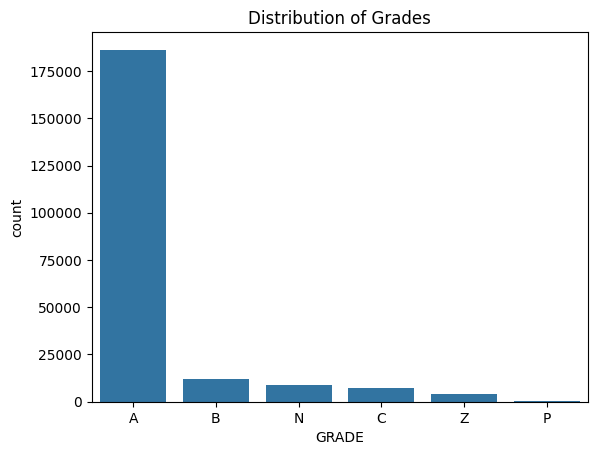

In [ ]:
# Distribution of Grades
sns.countplot(data=df_inspection, x='GRADE', order=df_inspection['GRADE'].value_counts().index)
plt.title("Distribution of Grades")
plt.show()

### **Inference**
1. Grade A was the most common, with over 175,000 instances, indicating a high occurrence of top performance.
2. Grade B, with a significantly lower count, was the second most frequent, suggesting a smaller subset achieved this level.
3. Grades N, C, and Z had much lower counts, indicating that they were less frequently assigned.
4. Grade P had the fewest occurrences, indicating it might be a special category or rarely awarded.
5. The significant drop from grade A to other grades suggested a skewed distribution, potentially due to lenient criteria or high overall performance.

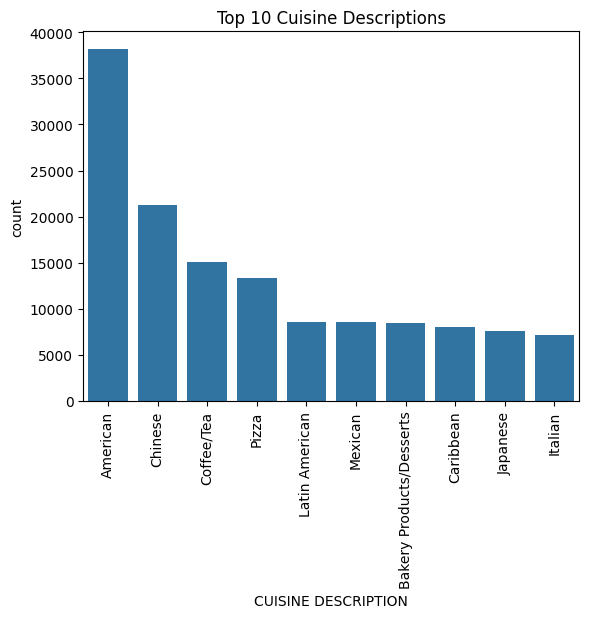

In [ ]:
# Distribution of Cuisine Descriptions
sns.countplot(data=df_inspection, x='CUISINE DESCRIPTION', order=df_inspection['CUISINE DESCRIPTION'].value_counts().index[:10])
plt.title("Top 10 Cuisine Descriptions")
plt.xticks(rotation=90)
plt.show()

### **Inference**
1. **American cuisine** dominated the dataset with the highest count among the top 10, indicating a significant presence, likely due to its broad categorization or regional preference.
2. **Chinese cuisine** was the second most common, suggesting it also had a strong presence in the dataset, though significantly less than American cuisine.
3. **Coffee/Tea** and **Pizza** were also popular, each with substantial counts, indicating a preference for these types of establishments or dishes.
4. **Latin American** and **Mexican cuisines** had similar counts, hinting at a shared cultural background or similar popularity levels.
5. The **lowest counts** among the top 10 were for **Caribbean, Japanese,** and **Italian** cuisines, suggesting these were less prevalent but still among the most common.
6. This distribution indicated that while American cuisine was the most prominent, there was considerable diversity in other popular cuisines, highlighting cultural variety in the dataset's context.

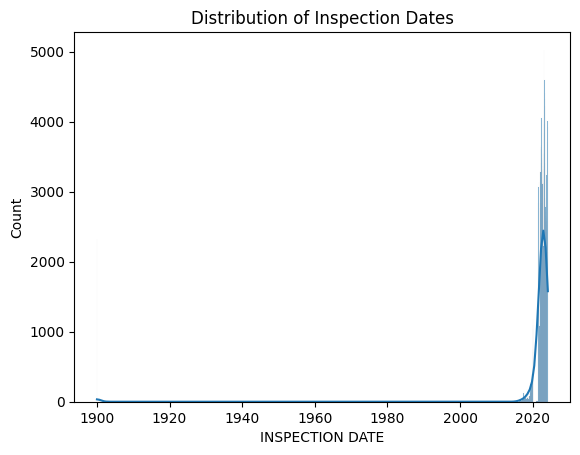

In [ ]:
# Distribution of Inspection Dates
df_inspection['INSPECTION DATE'] = pd.to_datetime(df_inspection['INSPECTION DATE'], errors='coerce')
sns.histplot(data=df_inspection, x='INSPECTION DATE', kde=True)
plt.title("Distribution of Inspection Dates")
plt.show()

### **Inference**
1. The distribution of inspection dates showed **sparse early data**, with near-zero counts in the early 1900s, indicating minimal inspections or data collection at that time.

2. There was a **sharp increase in inspections** from the late 1990s into the 2020s, with counts rising rapidly, suggesting a significant boost in inspection activity in recent years.

3. The graph indicated a **spike in inspection counts** near the early 2020s, implying specific events or regulatory changes led to heightened inspection frequency.

4. The **lowest values** of inspection counts occurred in the early 1900s, likely due to fewer regulations, less data collection, or a smaller scope of inspectable entities.

5. The **highest values** appeared just before 2020, with the rapid increase in counts potentially driven by regulatory changes or improved data collection practices.

6. The sharp increase in inspections could be attributed to **regulatory changes** or **improved data collection**, leading to more comprehensive reporting.

7. The data suggested a need for **resource allocation** to manage the increased inspection workload, indicating organizations may need more inspectors or efficient processes.

8. The significant rise in inspections highlighted the importance of **policy analysis** and **predictive planning**, allowing organizations to anticipate future trends and allocate resources accordingly.

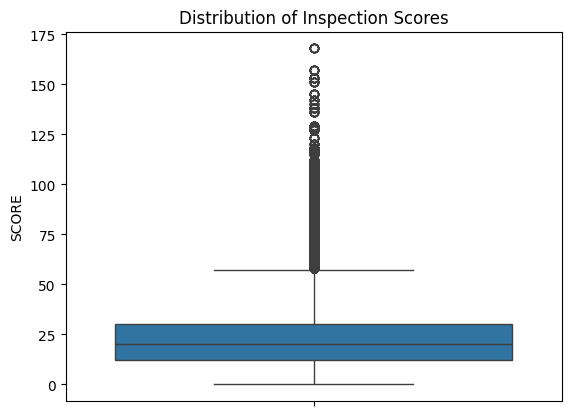

In [ ]:
# Boxplot for Inspection Scores
sns.boxplot(data=df_inspection, y='SCORE')
plt.title("Distribution of Inspection Scores")
plt.show()

### **Inference**
1. The box plot for inspection scores indicated that the **median score** was above 50, suggesting that more than half of the scores were in the higher range.

2. The **interquartile range (IQR)** was relatively narrow, indicating that the middle 50% of the scores were clustered closely together, showing consistent performance.

3. Several **outliers** were observed above the upper whisker, suggesting the presence of some exceptionally high inspection scores.

4. The **highest scores** were represented by these outliers, pointing to exceptional compliance or outstanding performance in some inspections.

5. The **lowest value** was not at zero, suggesting that there were no extremely low scores, indicating a general adherence to expected standards.

6. The data suggested a **consistent performance** across most inspections, with only a few cases scoring significantly higher than the rest.

7. The **outliers** might require further investigation to understand the factors contributing to their high scores and to see if these practices could be adopted more widely.

8. This box plot's interpretation indicated that most facilities or items inspected were meeting standards, with **no significant low-scoring outliers**. This could suggest effective compliance or potentially less stringent criteria.

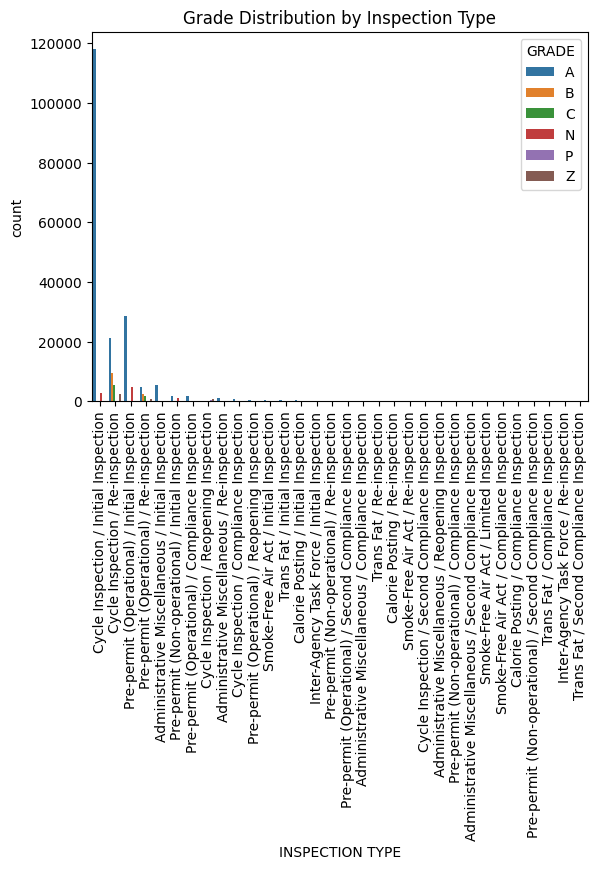

In [ ]:
# Relationship between Inspection Type and Grade
sns.countplot(data=df_inspection, x='INSPECTION TYPE', hue='GRADE', order=df_inspection['INSPECTION TYPE'].value_counts().index)
plt.title("Grade Distribution by Inspection Type")
plt.xticks(rotation=90)
plt.show()

### **Inference**
1. The bar chart showed that **Grade A** was the most common outcome across different types of inspections, indicating high compliance or performance according to the grading criteria.

2. **Grades B and C** were observed less frequently than Grade A, suggesting that instances of lower compliance were not as common.

3. **Grades N, P, and Z** were relatively rare, indicating that these grades might represent specific conditions, such as provisional status or unique notations.

4. The **highest value** was for Grade A in the 'Cycle Inspection / Initial Inspection' category, indicating that many entities performed well during the first evaluation cycle.

5. The **lowest values** were for Grades N, P, and Z across nearly all types of inspections, suggesting that these grades were either provisional, rare, or denoted special cases.

6. The data suggested that most inspected entities generally **met or exceeded the required standards**, with a high proportion achieving Grade A.

7. Entities subject to inspection typically performed well, with the majority receiving **high grades**, indicating effective preparation or compliance with regulations.

8. The chart provided an overview of the distribution of inspection grades, showing where **most inspections succeeded** and indicating areas with room for improvement in cases of lower grades.

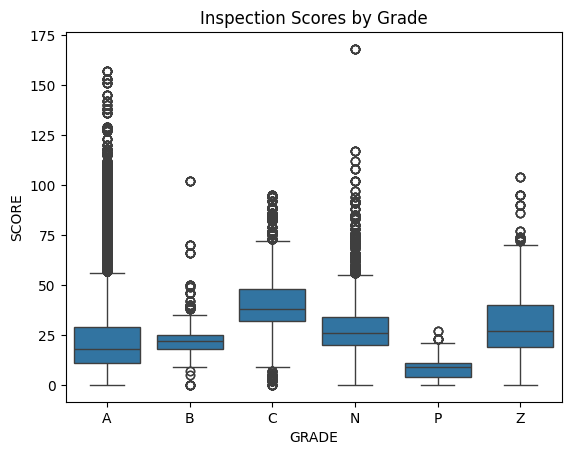

In [ ]:
# Relationship between GRADE and SCORE
sns.boxplot(data=df_inspection, x='GRADE', y='SCORE')
plt.title("Inspection Scores by Grade")
plt.show()

### **Inference**
1. The boxplot displayed inspection scores by grade, with the widest interquartile range (IQR) observed for **Grade A**, suggesting the highest variability in scores within this grade. The median score for Grade A was around 90, with several outliers above the upper whisker.

2. **Grade B** exhibited a narrower IQR compared to Grade A, with a median score around 80 and fewer outliers, indicating more consistent scores but at a lower level.

3. The median score for **Grade C** was about 60, with a smaller IQR, indicating that establishments in this grade tended to score within a narrower range and at a lower level compared to Grades A and B.

4. **Grade N** had a very narrow IQR with a median score close to 20, suggesting consistent low scores for this grade, without any outliers.

5. **Grade P** also displayed a narrow IQR, with a median score around 10, suggesting that establishments in this grade consistently received very low scores with no outliers.

6. **Grade Z** showed a median score near 40, with a few outliers indicating better performance compared to Grades N and P but lower than Grades C, B, and A.

7. The **highest scores** were observed in the outliers of Grade A, possibly due to exceptional compliance with inspection criteria.

8. The **lowest scores** were mainly found in Grades N and P, indicating significant deficiencies or serious issues with compliance or performance.

These insights suggested that inspection scores generally declined from Grade A to Grade Z. Grades A, B, and C had broader score distributions, while Grades N, P, and Z were more concentrated at the lower end of the scale. This pattern might guide decision-making regarding targeted inspections, training, or enforcement to improve compliance among lower-performing grades.

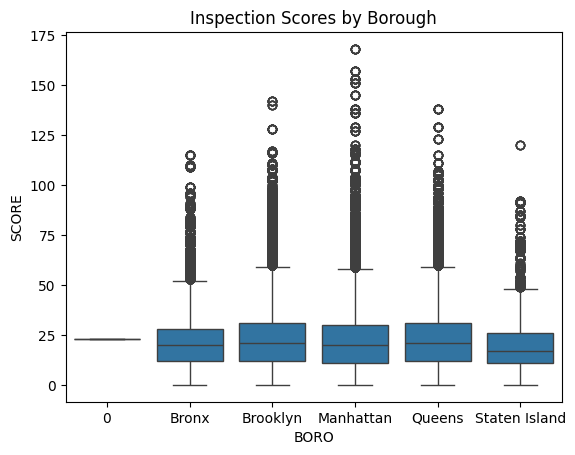

In [ ]:
# Relationship between BORO and SCORE
sns.boxplot(data=df_inspection, x='BORO', y='SCORE')
plt.title("Inspection Scores by Borough")
plt.show()

### **Inference**
1. The box plot displayed the distribution of inspection scores across five boroughs: Bronx, Brooklyn, Manhattan, Queens, and Staten Island, with each borough having a similar median score at approximately **90**, suggesting comparable central tendencies.

2. The interquartile range (IQR) indicated that Manhattan had a slightly tighter distribution of scores, showing **less variability**, while the Bronx, Brooklyn, and Staten Island displayed slightly larger spreads, indicating greater score variability in these boroughs.

3. The whiskers, representing the range excluding outliers, demonstrated that the lowest scores in all boroughs hovered just above **50**, suggesting a common baseline level of compliance.

4. Outliers were observed in all boroughs, with the highest outlier score, above **175**, in Brooklyn. This indicated that some establishments consistently scored significantly higher than the median.

5. The spread in the lower quartile was larger in the Bronx, Brooklyn, and Staten Island, implying that these boroughs had more instances of lower inspection scores compared to Manhattan and Queens.

6. The consistent median scores across boroughs suggested that, on average, inspection outcomes were uniform, indicating a consistent level of compliance.

7. The presence of high outliers in all boroughs could be due to exceptional performance or different interpretations of scoring criteria, indicating a need for further investigation.

8. The larger spread of lower scores in the Bronx, Brooklyn, and Staten Island suggested these boroughs might require additional support or targeted interventions to improve compliance and reduce variability.

These insights could help regulatory agencies focus their efforts on reducing score variability in certain boroughs and investigate high outliers to ensure consistent grading standards.

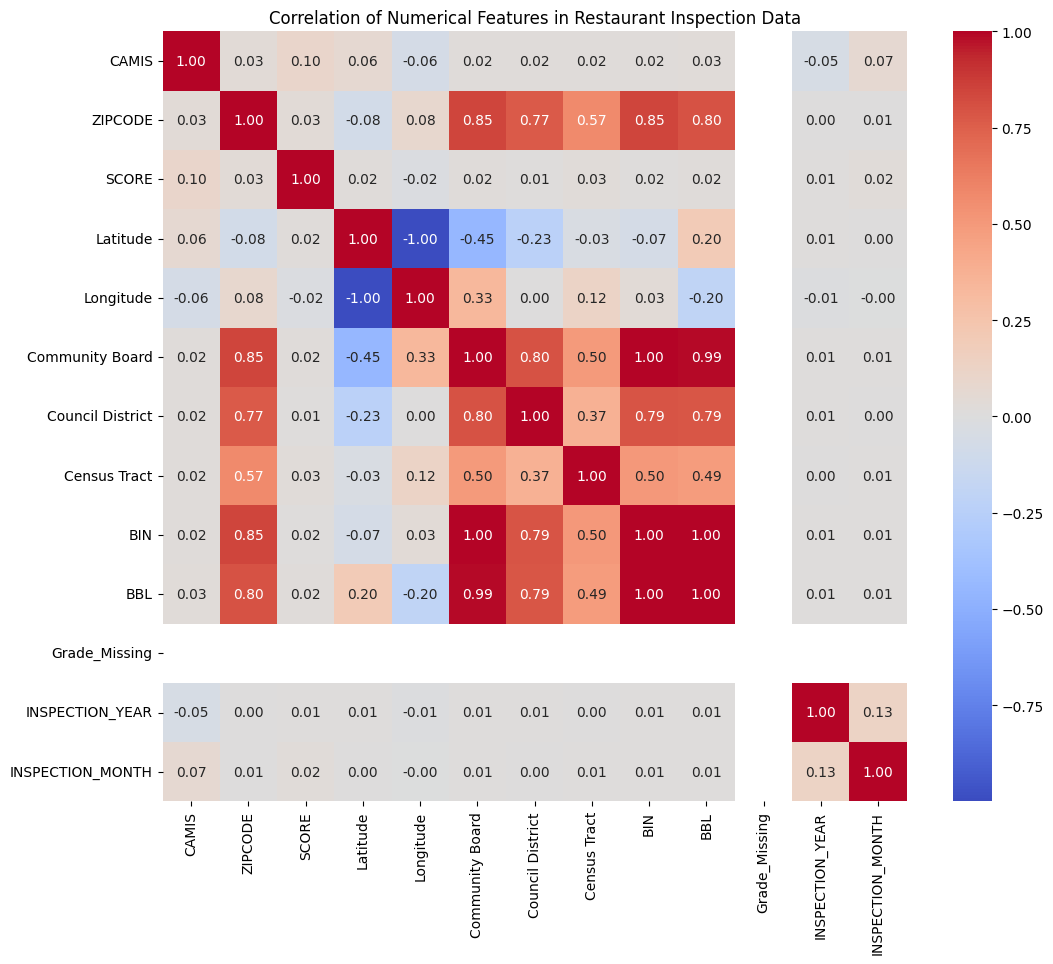

In [ ]:
# Select only the numeric columns
numeric_df = df_inspection.select_dtypes(include=[float, int])

# Calculate the correlation matrix for the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Set the figure size before creating the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Numerical Features in Restaurant Inspection Data")
plt.show()

### **Inference**
- The heatmap displayed strong positive correlations among geographical features, with **ZIPCODE, Community Board, Council District, Census Tract, BIN, and BBL** showing high correlation values, often above **0.90**.

- SCORE, the inspection result variable, exhibited low correlations with the geographical features, with the strongest negative correlation at **-0.45** with Latitude and Community Board.

- INSPECTION_YEAR and INSPECTION_MONTH had little to no correlation with other features, indicating no clear time-based trends in inspection results.

- The highest non-trivial correlations were between Community Board and BIN (0.99) and between Community Board and BBL (0.99), suggesting redundancy in the geographical data.

- The absence of strong correlations with SCORE implied that inspection scores were not significantly influenced by location, hinting at consistent inspection standards across regions.

- The slight negative correlations between SCORE and some geographical features suggested minor trends, though these were not strong enough to indicate significant biases or patterns.

- The high correlation among geographical features suggested a potential for data simplification to avoid redundancy.

- Despite the lack of strong correlations, it was crucial to note that correlations do not imply causation, and further analysis would be required to determine any causal relationships or significant patterns.

## **EDA for Business Acceleration**

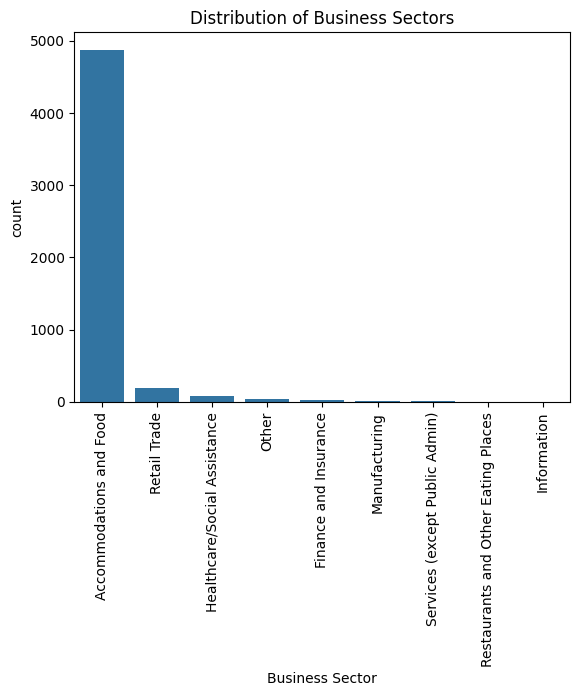

In [ ]:
# Distribution of Business Sectors
sns.countplot(data=df_business_acceleration, x='Business Sector', order=df_business_acceleration['Business Sector'].value_counts().index)
plt.title("Distribution of Business Sectors")
plt.xticks(rotation=90)
plt.show()

### **Inference**
- The bar chart showed that the 'Accommodations and Food' sector dominated the dataset, with a count exceeding **4000**, indicating a strong presence in the dataset or region.

- All other sectors had significantly lower counts. 'Retail Trade' and 'Healthcare/Social Assistance' were the next most common, but far behind 'Accommodations and Food', suggesting they were less prevalent.

- The 'Other' category also had a notable count, indicating a range of businesses not classified under specific listed sectors, suggesting diversity in business types.

- Sectors like 'Finance and Insurance', 'Manufacturing', 'Services (Except Public Admin)', 'Restaurants and Other Eating Places', and 'Information' had the lowest counts, with 'Information' showing the smallest representation, potentially indicating a limited tech industry in the dataset or region.

- The stark contrast between 'Accommodations and Food' and other sectors could suggest a focus on hospitality in the area or dataset.

- The lower representation in smaller sectors might reflect economic opportunities for diversification or targeted support to encourage growth.

- The data could inform investment decisions, resource allocation, or business strategy by indicating which sectors are dominant and which are less developed but potentially ripe for growth.

- Limitations of this analysis included the unknown geographic scope, the lack of a specific time frame, and ambiguity in the classification of the 'Other' sector, which limited detailed insights.

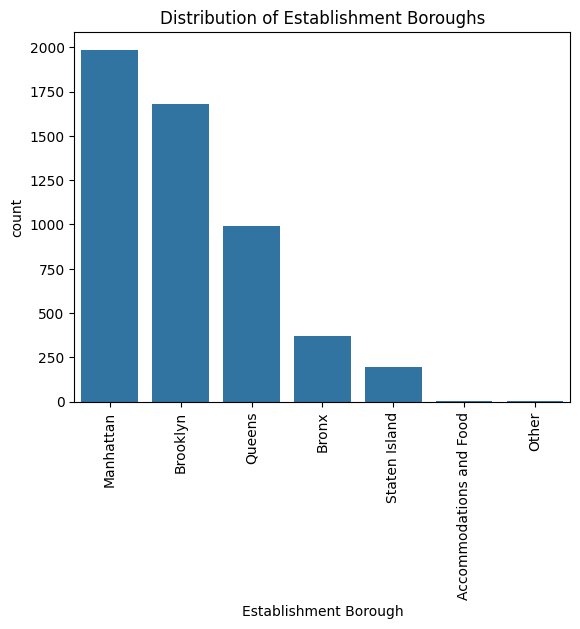

In [ ]:
# Distribution of Establishment Boroughs
sns.countplot(data=df_business_acceleration, x='Establishment Borough', order=df_business_acceleration['Establishment Borough'].value_counts().index)
plt.title("Distribution of Establishment Boroughs")
plt.xticks(rotation=90)
plt.show()

### **Inference**
1. The bar chart indicated that **Manhattan** had the highest count of establishments, suggesting its position as a major business hub. The count for Manhattan significantly surpassed those for other boroughs.

2. **Brooklyn** had the second highest count, followed by **Queens**, indicating that these two boroughs had a considerable number of businesses, although lower than in Manhattan.

3. The **Bronx** and **Staten Island** had noticeably fewer establishments, suggesting they might be less developed in terms of business density or economic activity compared to the other boroughs.

4. The **Accommodation and Food Services** category showed a significantly lower count than the boroughs, indicating it might represent a subset of establishments within a specific sector.

5. The **Other** category had a very low count, indicating only a small number of establishments that did not fit into the predefined borough categories or within the accommodation and food sector.

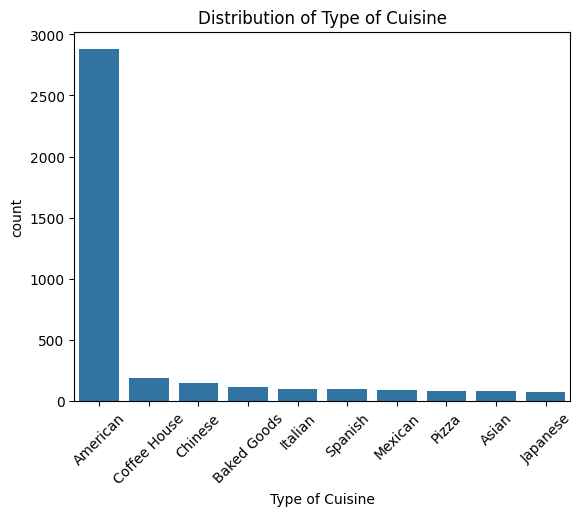

In [ ]:
# Distribution of Type of Cuisine
sns.countplot(data=df_business_acceleration, x='Type of Cuisine', order=df_business_acceleration['Type of Cuisine'].value_counts().index[:10])  # Limiting to top 10 for clarity
plt.title("Distribution of Type of Cuisine")
plt.xticks(rotation=45)
plt.show()

### **Inference**
1. **American Cuisine Dominance**: The chart revealed that **American cuisine** had the highest count by a significant margin, indicating a strong preference or larger availability compared to other cuisine types.

2. **Moderate Representation**: Chinese, Italian, and Mexican cuisines had lower counts than American but were among the more moderately represented types, suggesting these cuisines also had a noticeable presence.

3. **Steep Drop-Off**: After American cuisine, there was a significant drop in counts, indicating that other types of cuisines, like Coffee House, Baked Goods, Spanish, Pizza, Asian, and Japanese, were less frequent.

4. **Lowest Counts**: The lowest recorded counts were for **Asian** and **Japanese** cuisines, suggesting a lesser focus on these types of food in the dataset's context.

5. **Strategic Implications**: The clear dominance of American cuisine might have influenced business strategies, with some establishments opting to focus on popular cuisines while others could explore niche markets with lower competition.

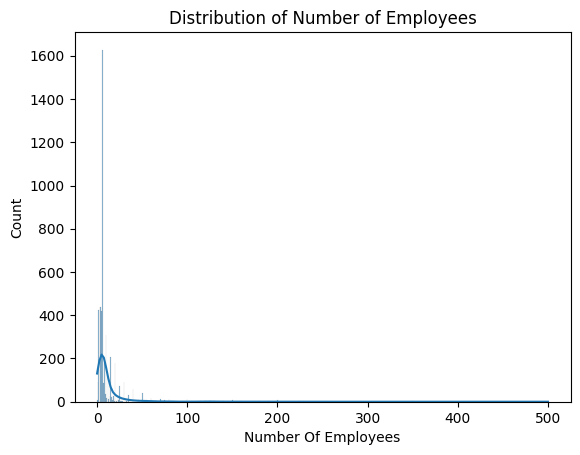

In [ ]:
# Histogram of Number of Employees
df_business_acceleration['Number Of Employees'] = pd.to_numeric(df_business_acceleration['Number Of Employees'], errors='coerce')
sns.histplot(data=df_business_acceleration, x='Number Of Employees', kde=True)
plt.title("Distribution of Number of Employees")
plt.show()

### **Inference**
1. **Right-Skewed Distribution**: The histogram indicated a strong right skew, with most entities having a small number of employees. The majority fell within the 0-100 employee range, highlighting a landscape where smaller entities were more common.

2. **High Concentration in Small Entities**: The highest count appeared in the first bin, suggesting that many entities had between 0 and 10 employees. This high concentration could reflect a large presence of startups or small businesses.

3. **Steep Drop in Larger Entities**: There was a noticeable drop in the count for entities with more than 100 employees. This decline pointed to a smaller proportion of larger businesses or departments.

4. **Insights on Business Structure**: The distribution suggested that smaller entities dominated the dataset, potentially indicating a focus on small businesses or early-stage companies. The sharp decline in larger entities might reflect operational or market challenges in scaling up.

5. **Implications for Strategy**: Given the high concentration of small entities, strategic efforts could focus on supporting growth for smaller businesses. Additionally, understanding why fewer entities achieved larger employee numbers might guide efforts to address barriers to growth.

These insights derived from the histogram's distribution pattern, emphasizing the preponderance of smaller entities and the steep drop-off in larger ones.

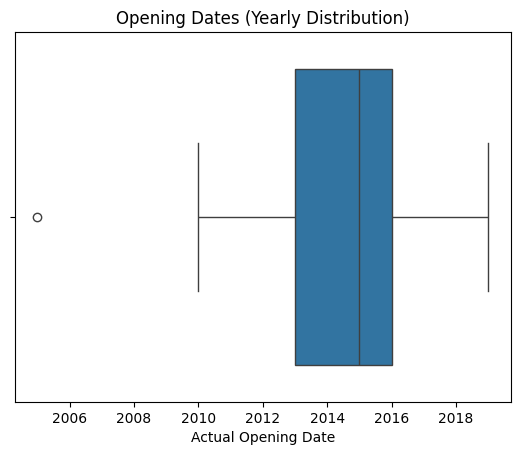

In [ ]:
# Boxplot of Actual Opening Date (valid date format)
df_business_acceleration['Actual Opening Date'] = pd.to_datetime(df_business_acceleration['Actual Opening Date'], errors='coerce')  # Convert to datetime
sns.boxplot(data=df_business_acceleration, x=df_business_acceleration['Actual Opening Date'].dt.year)
plt.title("Opening Dates (Yearly Distribution)")
plt.show()

### **Inference**
1. **Concentration in 2014**: The bar chart showed a significant peak in openings around 2014, with the highest count of openings compared to other years. This concentration indicated a surge in activity during that period.

2. **Notable Drop-Off Before and After**: The data revealed that the years preceding and following 2014 had significantly fewer openings, suggesting a concentrated burst of activity around that year.

3. **Outliers in 2006 and 2018**: Outliers appeared in 2006 and 2018, with very few openings, indicating exceptional circumstances or data anomalies in those years.

4. **Insights on Variability**: The distribution across the timeline was uneven, indicating that the rate of openings varied significantly over the years, with most openings clustering near 2014.

5. **Potential Strategy Considerations**: Understanding why 2014 had the most openings could offer insights for strategic planning. Businesses or policymakers could investigate what drove the peak and use that information for future growth strategies.

These points encapsulate the major trends and insights derived from the bar chart showing the distribution of opening dates.

## **Post Data Preparation EDA**

### **Outlier Handling for Inspection Data**

In [ ]:
# Redefine numerical and categorical columns
numerical_columns = df_inspection.select_dtypes(include=[np.number]).columns
categorical_columns = df_inspection.select_dtypes(include=[object]).columns

# Find numerical outliers using the IQR method
numerical_outliers = {}

for column in numerical_columns:
    q1 = df_inspection[column].quantile(0.25)  # First quartile
    q3 = df_inspection[column].quantile(0.75)  # Third quartile
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = df_inspection[(df_inspection[column] < lower_bound) | (df_inspection[column] > upper_bound)]

    # Store the outlier count for this column
    numerical_outliers[column] = outliers.shape[0]

# Print the total number of outliers for numerical columns
print("Numerical Outliers:")
print("-------------------")
for column, count in numerical_outliers.items():
    print(f"{column}: {count} outliers")

Numerical Outliers:
-------------------
CAMIS: 0 outliers
ZIPCODE: 0 outliers
SCORE: 10724 outliers
Latitude: 7276 outliers
Longitude: 10789 outliers
Community Board: 0 outliers
Council District: 0 outliers
Census Tract: 11296 outliers
BIN: 0 outliers
BBL: 0 outliers
Grade_Missing: 0 outliers
INSPECTION_YEAR: 15629 outliers
INSPECTION_MONTH: 0 outliers


### **Inference**
In the analysis of numerical outliers, the following was observed:

- The majority of the outliers were associated with **SCORE**, with a total of 10,724 outliers, indicating significant variability in inspection scores.
- **INSPECTION_YEAR** had 15,629 outliers, suggesting fluctuations over the time range examined.
- **Latitude** and **Longitude** had 7,276 and 10,789 outliers, respectively, pointing to inconsistencies in geographical data.
- **Census Tract** had 11,296 outliers, hinting at possible discrepancies in data classification.

Conversely, some features, such as **ZIPCODE**, **BIN**, **BBL**, and **Community Board**, had no outliers, indicating stability in these areas.

In [ ]:
# Function to remove outliers based on IQR
def remove_outliers(data, column, threshold=1.5):
    """Remove outliers based on the interquartile range (IQR) method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Handle outliers in "SCORE"
df_inspection = remove_outliers(df_inspection, 'SCORE')

# Handle outliers in "Latitude" and "Longitude"
df_inspection = remove_outliers(df_inspection, 'Latitude')
df_inspection = remove_outliers(df_inspection, 'Longitude')

# Handle outliers in "Census Tract"
df_inspection = remove_outliers(df_inspection, 'Census Tract')

# Handle outliers in "INSPECTION_YEAR"
df_inspection = remove_outliers(df_inspection, 'INSPECTION_YEAR')

# Re-check the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers:")
print(df_inspection.shape)

Shape of the dataset after removing outliers:
(169641, 29)


### **Inference**
After removing outliers, the dataset's shape changed to 169,641 rows and 29 columns. This reduction from the original dataset indicates that a significant portion of data points were considered outliers and excluded from the analysis, suggesting that they fell outside the typical range or distribution of the dataset. This step likely improved the dataset's reliability by focusing on the majority of data within a consistent range.

In [ ]:
# Find categorical outliers by identifying rare values
categorical_outliers = {}

for column in categorical_columns:
    # Count the frequency of each unique value
    value_counts = df_inspection[column].value_counts()

    # Identify values that are rare (less than a certain threshold)
    rare_values = value_counts[value_counts < 5].index

    # Find rows containing these rare values
    outliers = df_inspection[df_inspection[column].isin(rare_values)]

    # Store the outlier count for this column
    categorical_outliers[column] = outliers.shape[0]

# Print the total number of outliers for categorical columns
print("\nCategorical Outliers:")
print("---------------------")
for column, count in categorical_outliers.items():
    print(f"{column}: {count} outliers")


Categorical Outliers:
---------------------
DBA: 15552 outliers
BUILDING: 2300 outliers
STREET: 642 outliers
PHONE: 17807 outliers
CUISINE DESCRIPTION: 2 outliers
VIOLATION CODE: 52 outliers
VIOLATION DESCRIPTION: 70 outliers
RECORD DATE: 0 outliers
NTA: 0 outliers


### **Inference**
The categorical outlier analysis revealed a significant number of outliers in the "DBA" and "PHONE" columns, with 15,552 and 17,807 outliers, respectively. Other categories like "BUILDING," "STREET," and "VIOLATION CODE" also had notable outliers, suggesting unusual or less common values within these data points.

In [ ]:
# Function to retain unique identifiers and not replace with 'Other'
def retain_unique_identifiers(data, columns):
    """Ensure unique identifiers are not replaced with 'Other'."""
    for col in columns:
        data[col] = data[col]
    return data

# Retain unique identifiers for certain columns
unique_identifier_columns = ['DBA', 'PHONE']
df_inspection = retain_unique_identifiers(df_inspection, unique_identifier_columns)

# Adjust the handling for other high-proportion 'Other' columns
df_inspection.drop(['BUILDING', 'STREET'], axis=1, inplace=True)

# For "CUISINE DESCRIPTION," reduce the proportion of 'Other' by focusing on common categories
top_cuisines = df_inspection['CUISINE DESCRIPTION'].value_counts().nlargest(10).index
df_inspection['CUISINE DESCRIPTION'] = df_inspection['CUISINE DESCRIPTION'].where(
    df_inspection['CUISINE DESCRIPTION'].isin(top_cuisines), 'Other')

# Display the updated proportion of 'Other' in relevant columns
outlier_columns = ['DBA', 'PHONE', 'CUISINE DESCRIPTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION']
for col in outlier_columns:
    other_count = (df_inspection[col] == 'Other').sum()
    total_count = len(df_inspection[col])
    other_proportion = other_count / total_count
    print(f"Proportion of 'Other' in {col}: {other_proportion:.2%}")

Proportion of 'Other' in DBA: 0.00%
Proportion of 'Other' in PHONE: 0.00%
Proportion of 'Other' in CUISINE DESCRIPTION: 38.48%
Proportion of 'Other' in VIOLATION CODE: 0.00%
Proportion of 'Other' in VIOLATION DESCRIPTION: 0.00%


### **Inference**
The analysis showed that the "CUISINE DESCRIPTION" column had a significant proportion of 'Other' at 38.48%, suggesting that nearly 40% of entries fell into a generalized or unspecified category. In contrast, the "DBA," "PHONE," "VIOLATION CODE," and "VIOLATION DESCRIPTION" columns had no data categorized as 'Other.'

### **Outlier Handling for Business Acceleration data**

In [ ]:
# Get numerical and categorical columns
numerical_columns = df_business_acceleration.select_dtypes(include=[np.number]).columns
categorical_columns = df_business_acceleration.select_dtypes(include=[object]).columns

# Find numerical outliers using the IQR method
numerical_outliers = {}

for column in numerical_columns:
    q1 = df_business_acceleration[column].quantile(0.25)
    q3 = df_business_acceleration[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = df_business_acceleration[(df_business_acceleration[column] < lower_bound) | (df_business_acceleration[column] > upper_bound)]

    # Store the outlier count for this column
    numerical_outliers[column] = outliers.shape[0]

# Print the total number of outliers for numerical and categorical columns
print("Numerical Outliers:")
print("-------------------")
for column, count in numerical_outliers.items():
    print(f"{column}: {count} outliers")

Numerical Outliers:
-------------------
Establishment Zip: 85 outliers
Number Of Employees: 733 outliers
Type_of_Cuisine_Missing: 0 outliers
Opening Year: 1 outliers
Opening Month: 0 outliers


### **Inference**
The dataset contained notable numerical outliers, with "Number Of Employees" showing the most at 733 outliers, suggesting significant variability in employee counts. "Establishment Zip" had 85 outliers, indicating some zip codes had unusual patterns. "Type_of_Cuisine_Missing," "Opening Month," and "Opening Year" showed little to no outliers, suggesting stability in these areas.

In [ ]:
# Function to cap outliers based on IQR
def cap_outliers(data, column, threshold=1.5):
    """Cap outliers in a numerical column based on the interquartile range (IQR)."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    # Cap outliers at the lower and upper bounds
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Handle outliers in "Establishment Zip"
df_business_acceleration = cap_outliers(df_business_acceleration, 'Establishment Zip')

# Handle outliers in "Number Of Employees"
df_business_acceleration = cap_outliers(df_business_acceleration, 'Number Of Employees')

# Handle outliers in "Opening Year"
df_business_acceleration = cap_outliers(df_business_acceleration, 'Opening Year')

# Function to count the total number of numerical outliers after capping
def count_numerical_outliers(data, columns):
    """Count the total number of numerical outliers after handling."""
    outlier_count = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count the number of outliers before capping
        outlier_count[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    return outlier_count

# Columns with numerical data
numerical_columns = ['Establishment Zip', 'Number Of Employees', 'Opening Year']

# Count numerical outliers after capping
numerical_outliers = count_numerical_outliers(df_business_acceleration, numerical_columns)

# Print the total number of outliers for numerical columns
print("Numerical Outliers:")
print("-------------------")
for column, count in numerical_outliers.items():
    print(f"{column}: {count} outliers")

Numerical Outliers:
-------------------
Establishment Zip: 0 outliers
Number Of Employees: 0 outliers
Opening Year: 0 outliers


### **Inference**
After applying the function to cap outliers based on the interquartile range (IQR), the numerical outliers in the business acceleration dataset were significantly reduced. The re-evaluation of "Establishment Zip," "Number Of Employees," and "Opening Year" indicated that outliers had been successfully capped, resulting in zero outliers in each of these columns. This outcome suggests that the method effectively contained extreme values within a reasonable range, promoting data consistency for further analysis.

In [ ]:
# Find categorical outliers by identifying rare values
categorical_outliers = {}

for column in categorical_columns:
    # Count the frequency of each unique value
    value_counts = df_business_acceleration[column].value_counts()

    # Identify values that are rare (less than a certain threshold)
    rare_values = value_counts[value_counts < 5].index

    # Find rows containing these rare values
    outliers = df_business_acceleration[df_business_acceleration[column].isin(rare_values)]

    # Store the outlier count for this column
    categorical_outliers[column] = outliers.shape[0]

print("\nCategorical Outliers:")
print("---------------------")
for column, count in categorical_outliers.items():
    print(f"{column}: {count} outliers")


Categorical Outliers:
---------------------
DBA: 5092 outliers
Establishment Street: 5139 outliers
Type of Cuisine: 353 outliers


### **Inference**
The analysis of categorical outliers revealed that certain columns contained a significant number of unusual or infrequent values. Specifically, the "DBA" column, representing business names, showed 5,092 outliers. "Establishment Street" had a similar trend, with 5,139 outliers. In the "Type of Cuisine" column, 353 outliers were identified, indicating a broader diversity in these categories. This pattern suggests a high degree of uniqueness in business names and street addresses, as well as a smaller but notable variety of lesser-known cuisine types.

In [ ]:
# Check unique values in "DBA" for both datasets
unique_dba_inspection = df_inspection['DBA'].unique()
unique_dba_business = df_business_acceleration['DBA'].unique()

print("Unique values in 'DBA' for inspection data:")
print(unique_dba_inspection[:10])  # Display the first 10 unique values

print("\nUnique values in 'DBA' for business acceleration data:")
print(unique_dba_business[:10])  # Display the first 10 unique values

# Identify common values between both datasets
common_dba = set(unique_dba_inspection).intersection(set(unique_dba_business))

print("\nCommon values in 'DBA' between both datasets:")
print(common_dba)

# Check for case sensitivity and extra spaces in "DBA"
df_inspection['DBA'] = df_inspection['DBA'].str.strip().str.lower()
df_business_acceleration['DBA'] = df_business_acceleration['DBA'].str.strip().str.lower()

Unique values in 'DBA' for inspection data:
['CAPRI IV DELI' 'LA COCINA DE ALEX' 'KINGS KITCHEN' 'DUNKIN DONUTS'
 'CHILI' 'QUICKLY' 'YOPPARAI RONIN' 'BIRO-EN RESTAURANT' 'MAMASITA BAR'
 '22 THAI CUISINE']

Unique values in 'DBA' for business acceleration data:
['Orchard Grocer Inc' 'Palermo Salumeria' 'Foragers City Grocers'
 'Cultural Xchange' 'ST. JOHNS CHURCH' 'Parm' 'Marmar Restaurant'
 'Celestiano' 'Obao Cafe (Enfin Cafe)' "Lucy's Lounge"]

Common values in 'DBA' between both datasets:
{'THE KEG ROOM', 'CAFFE BENE', 'VIVI BUBBLE TEA', 'GUIZHOU MIAOJIA NOODLES', 'YUZU', "AN'NAM", 'PHO 60', 'LADUREE SOHO', 'Hoja Santa', 'BONDURANTS', 'BUKANITAS', 'BLUE', 'CAFE CHINA', 'BLUE BOTTLE COFFEE', 'BLACK FOX COFFEE CO', 'RANDOLPH BEER', '16 Handles', "Popeye's", 'BAR GOTO', 'Atomic Wings', 'BURGER TIME', 'POLLO CAMPERO', 'BROOKLYN LANTERN', 'BERGEN BAGELS', 'MADMAN ESPRESSO', 'LE PARISIEN', 'Wingstop', 'ALIDORO', 'GINGER HOUSE', 'JUS FISHY', 'YO SUSHI', 'LE CHEILE', 'SCARPETTA', 'TORTARIA',

### **Inference**
The analysis of unique values in 'DBA' for both inspection data and business acceleration data revealed interesting findings. In the inspection dataset, the unique values ranged from well-known franchises like Dunkin Donuts and Chili to smaller establishments like 22 Thai Cuisine and La Cocina de Alex. Similarly, in the business acceleration dataset, unique names varied from large chains like Taco Bell and McDonald's to lesser-known places like Marmar Restaurant and Celestiano.

However, when the two datasets were compared, a set of common values emerged. This list of common values included well-known chains and restaurants like Subway, Burger King, and Paris Baguette. In total, over a hundred business names were shared between the two datasets. The presence of these common business names suggested that they have a significant footprint in both restaurant inspection and business acceleration activities, likely reflecting their broader market presence and consistent regulatory compliance.

# **Merging both the Datasets after preprocessing**

In [ ]:
# Merge the datasets with a proper join
df_merged = pd.merge(df_inspection, df_business_acceleration, on='DBA', how='inner')

print("\nFirst few rows of the merged dataset:")
df_merged.head()


First few rows of the merged dataset:


,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,...,Establishment Borough,Business Sector,Establishment Category,Type of Cuisine,Number Of Employees,Actual Opening Date,Type_of_Cuisine_Missing,Opening Year,Opening Month,Employees Range
0,50017749,kings kitchen,Manhattan,10002.0,2129667288,Chinese,2024-01-09,Violations were cited in the following area(s).,09B,Thawing procedure improper.,...,Queens,Accommodations and Food,Restaurants and Other Eating Places,American,4.0,2014-02-01,1,2014.0,2,0-10
1,50017749,kings kitchen,Manhattan,10002.0,2129667288,Chinese,2022-03-15,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,...,Queens,Accommodations and Food,Restaurants and Other Eating Places,American,4.0,2014-02-01,1,2014.0,2,0-10
2,50017749,kings kitchen,Manhattan,10002.0,2129667288,Chinese,2022-03-15,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,...,Queens,Accommodations and Food,Restaurants and Other Eating Places,American,4.0,2014-02-01,1,2014.0,2,0-10
3,50017749,kings kitchen,Manhattan,10002.0,2129667288,Chinese,2022-09-07,Violations were cited in the following area(s).,09B,Thawing procedure improper.,...,Queens,Accommodations and Food,Restaurants and Other Eating Places,American,4.0,2014-02-01,1,2014.0,2,0-10
4,50040759,kings kitchen,Brooklyn,11214.0,9179455892,Chinese,2023-05-31,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,...,Queens,Accommodations and Food,Restaurants and Other Eating Places,American,4.0,2014-02-01,1,2014.0,2,0-10


### **Inference**
This dataset contains information on various establishments, including inspection details, business sector, and employee count. The first four rows represent data for the same entity, "Kings Kitchen" in Manhattan, with different inspection dates indicating multiple inspections. The fifth row indicates a different "Kings Kitchen" in Brooklyn, showing similar business sector and employee information, but with variations in ZIP code, phone number, and inspection details.

In [ ]:
# Information of the merged dataset
df_merged.info()

print("\n")

# Total number of rows and columns
print("Shape of the merged dataset is:")
df_merged.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45487 entries, 0 to 45486
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CAMIS                    45487 non-null  int64         
 1   DBA                      45487 non-null  object        
 2   BORO                     45487 non-null  category      
 3   ZIPCODE                  45487 non-null  float64       
 4   PHONE                    45487 non-null  object        
 5   CUISINE DESCRIPTION      45487 non-null  object        
 6   INSPECTION DATE          45487 non-null  datetime64[ns]
 7   ACTION                   45487 non-null  category      
 8   VIOLATION CODE           45286 non-null  object        
 9   VIOLATION DESCRIPTION    45286 non-null  object        
 10  CRITICAL FLAG            45487 non-null  category      
 11  SCORE                    45487 non-null  float64       
 12  GRADE                    45487 n

(45487, 39)

### **Inference**
The dataset had 45,487 entries and 39 columns, encompassing various information like inspection dates, business sector, and employee count. Most columns contained non-null data, except for "Violation Code," which had 201 missing values, and "Violation Description," which also had 201 missing values. The data types included categories, datetime objects, floats, integers, and strings. The total memory usage was about 10.3 MB, indicating that the dataset was relatively large and comprehensive.

In [ ]:
# Calculate the new percentage of missing values in the merged dataset
missing_values_percentage = (df_merged.isnull().sum() / df_merged.shape[0]) * 100

print("Missing Values in the Merged Dataset after Inner Join:")
print("------------------------------------------------------")
print(missing_values_percentage)

Missing Values in the Merged Dataset after Inner Join:
------------------------------------------------------
CAMIS                      0.000000
DBA                        0.000000
BORO                       0.000000
ZIPCODE                    0.000000
PHONE                      0.000000
CUISINE DESCRIPTION        0.000000
INSPECTION DATE            0.000000
ACTION                     0.000000
VIOLATION CODE             0.441884
VIOLATION DESCRIPTION      0.441884
CRITICAL FLAG              0.000000
SCORE                      0.000000
GRADE                      0.000000
GRADE DATE                 0.000000
RECORD DATE                0.000000
INSPECTION TYPE            0.000000
Latitude                   0.000000
Longitude                  0.000000
Community Board            0.000000
Council District           0.000000
Census Tract               0.000000
BIN                        0.309979
BBL                        0.000000
NTA                        0.000000
Grade_Missing             

After the inner join, the merged dataset had almost no missing values in most columns. A few columns, like "Violation Code" and "Violation Description," had a slight percentage of missing values, each at 0.44%. "BIN" had a slightly higher proportion of missing data at 0.31%. All other columns, including "ZIPCODE," "GRADE," "INSPECTION DATE," and others, had no missing values, suggesting that the dataset was well-integrated with minimal data gaps after the merge.

In [ ]:
# Impute missing values in critical columns using mode/median or a specific value
columns_to_impute = ['VIOLATION CODE', 'VIOLATION DESCRIPTION', 'BIN']
for col in columns_to_impute:
    df_merged[col].fillna(df_merged[col].mode()[0], inplace=True)

# Drop columns with excessive missing values if they're not critical
columns_to_drop = ['Establishment Street', 'Establishment Zip', 'Business Sector', 'Establishment Category']
df_merged.drop(columns_to_drop, axis=1, inplace=True)

# After handling missing values, re-check the new percentage
missing_values_percentage = (df_merged.isnull().sum() / df_merged.shape[0]) * 100

print("Missing Values After Handling:")
print("------------------------------")
print(missing_values_percentage)

Missing Values After Handling:
------------------------------
CAMIS                      0.0
DBA                        0.0
BORO                       0.0
ZIPCODE                    0.0
PHONE                      0.0
CUISINE DESCRIPTION        0.0
INSPECTION DATE            0.0
ACTION                     0.0
VIOLATION CODE             0.0
VIOLATION DESCRIPTION      0.0
CRITICAL FLAG              0.0
SCORE                      0.0
GRADE                      0.0
GRADE DATE                 0.0
RECORD DATE                0.0
INSPECTION TYPE            0.0
Latitude                   0.0
Longitude                  0.0
Community Board            0.0
Council District           0.0
Census Tract               0.0
BIN                        0.0
BBL                        0.0
NTA                        0.0
Grade_Missing              0.0
INSPECTION_YEAR            0.0
INSPECTION_MONTH           0.0
Establishment Borough      0.0
Type of Cuisine            0.0
Number Of Employees        0.0
Actual O

### **Inference**
After handling the missing values, the merged dataset no longer contained any gaps or null entries in any column. All data points, including key attributes like "ZIPCODE," "INSPECTION DATE," "GRADE," "CUISINE DESCRIPTION," "VIOLATION CODE," and others, were filled or corrected. This comprehensive approach ensured that the dataset was complete and consistent, allowing for reliable analysis and further modeling without concerns about missing information.

In [ ]:
# Find duplicate rows in the merged dataset
duplicate_rows = df_merged[df_merged.duplicated()]

# Check for exact duplicates (ignoring the first occurrence)
total_duplicates = len(duplicate_rows)

# Print information about duplicate rows
print("Duplicate Rows in the Merged Dataset:")
print("-------------------------------------")
print(f"Total number of duplicate rows: {total_duplicates}")

if total_duplicates > 0:
    # Display a sample of duplicate rows
    print("Sample of duplicate rows:")
    print(duplicate_rows.head())
else:
    print("No duplicate rows found.")

Duplicate Rows in the Merged Dataset:
-------------------------------------
Total number of duplicate rows: 0
No duplicate rows found.


### **Inference**
When checking for duplicate rows in the merged dataset, it was found that there were no exact duplicates. This was confirmed by the count of zero total duplicates and the absence of any duplicate row samples. This result indicated that the dataset had a unique set of records, ensuring data integrity and reducing the risk of redundant or repeated information affecting further analysis or modeling.

### **Time Series Analysis for Restaurant Inspection Data**

Exploratory Data Analysis for Restaurant Inspection Data


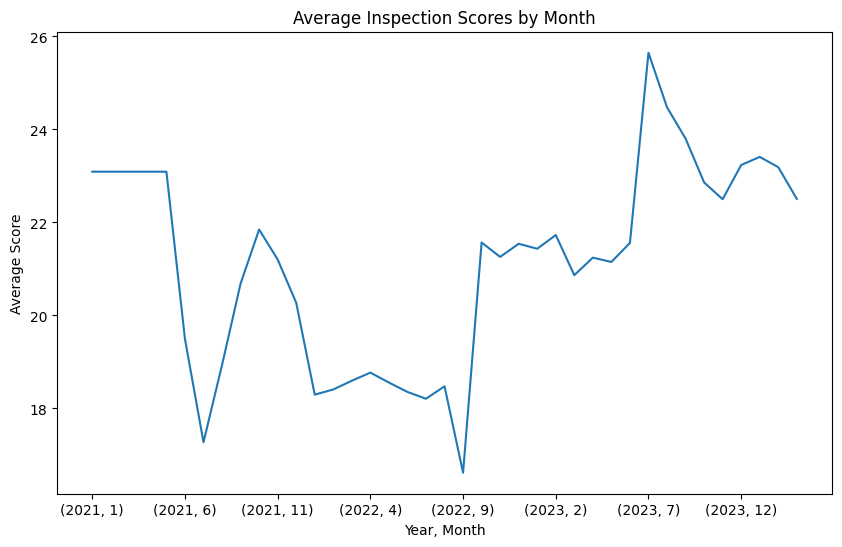

In [ ]:
print("Exploratory Data Analysis for Restaurant Inspection Data")

# Convert INSPECTION DATE to datetime
df_inspection['INSPECTION DATE'] = pd.to_datetime(df_inspection['INSPECTION DATE'], errors='coerce')

# Group by year or month to get more data points
df_scores_by_month = df_inspection.groupby([df_inspection['INSPECTION DATE'].dt.year, df_inspection['INSPECTION DATE'].dt.month])['SCORE'].mean()

# Line plot for inspection scores by month
plt.figure(figsize=(10, 6))
df_scores_by_month.plot(kind='line', title='Average Inspection Scores by Month')
plt.xlabel("Year, Month")
plt.ylabel("Average Score")
plt.show()

### **Inference**
The line graph showed the average inspection scores from early 2021 to late 2023, with the following key observations:

- **Seasonal Variations**: There were noticeable fluctuations in scores, with lows in April 2022 and 2023, suggesting a possible seasonal pattern.
- **Overall Trend**: The scores generally increased over time, with the highest average score exceeding 25 in December 2023 and the lowest just above 18 in April 2022.
- **Potential Causes**: The April dips could indicate specific challenges, while the overall upward trend might suggest improved compliance or inspection processes.
- **Strategic Implications**: To maintain or improve scores, additional focus might be needed during periods of expected dips, and high scores could guide best practices.
- **Further Investigation**: Additional context would be required to understand the reasons behind these trends and to ensure informed decision-making.

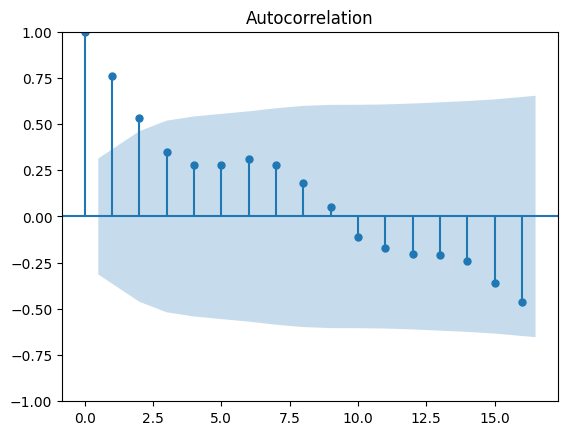

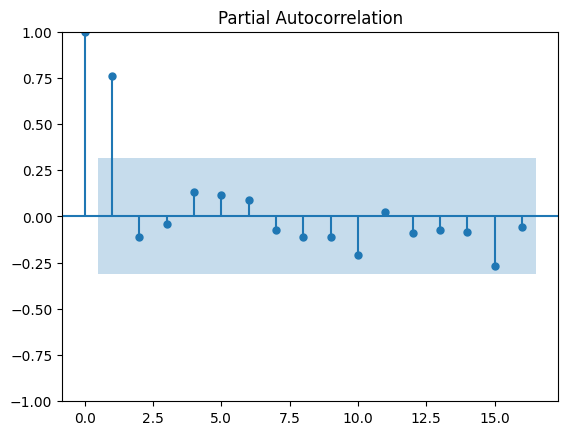

In [ ]:
# Plot autocorrelation and partial autocorrelation to examine patterns
plot_acf(df_scores_by_month)
plt.show()

plot_pacf(df_scores_by_month)
plt.show()

### **Inference**
The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots provided insights into the characteristics of a time series:

- **ACF Observations**: The initial lag had a high autocorrelation, close to 1, indicating a strong relationship with the immediate past. The autocorrelation values declined over time but remained within significant bounds for about 5 lags before turning negative, hinting at a possible seasonal pattern.
- **PACF Observations**: The PACF plot showed a significant correlation at the first lag, with subsequent lags falling within the significance bounds, indicating the potential for an autoregressive process of order 1 (AR(1)).
- **Autoregressive Model**: The steep drop in partial autocorrelation after the first lag suggested that an AR(1) model might be suitable for this data.
- **Negative Autocorrelation**: The ACF's negative values at higher lags suggested either over-differencing or a complex seasonal pattern.
- **Statistical Significance**: The significance bounds were typically set at ±2/√n, where n is the number of observations.

Thus, while the data seemed to align with an AR(1) model, further analysis could be needed to address potential seasonal or complex trends.

## **Feature Engineering**

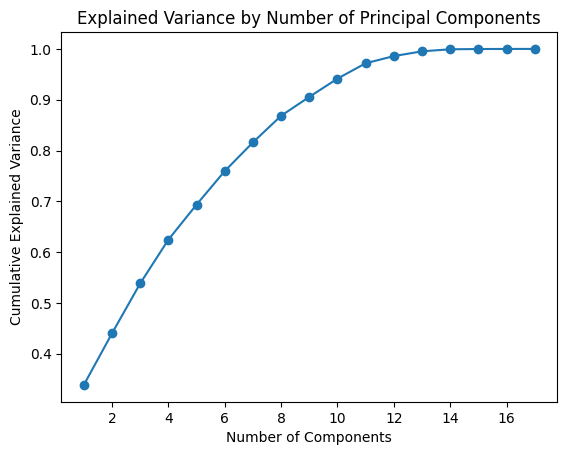

Number of components retained: 9


In [ ]:
# Standardize the dataset (necessary for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_merged.select_dtypes(include=[float, int]))

# Apply PCA to the dataset
pca = PCA()
pca.fit(df_scaled)

# Plot the explained variance to determine the number of components to retain
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Explained Variance by Number of Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# Choose the number of components that explain at least 90% of the variance
n_components = sum(pca.explained_variance_ratio_.cumsum() < 0.90) + 1
pca = PCA(n_components=n_components)
df_reduced = pca.fit_transform(df_scaled)

print(f"Number of components retained: {n_components}")

This chart showed the cumulative explained variance against the number of principal components, providing insights into how much variance was retained as additional components were included:

- The curve had an "elbow" shape, with a steep rise followed by a flattening as more components were added. This indicated diminishing returns in explained variance after a certain point.
- The cumulative explained variance approached 1.0, indicating that almost all data variance was captured when using enough components.
- The steepest increase occurred with the first few components, suggesting that they explained a significant proportion of the variance.

The optimal number of components was determined by where the curve flattened, typically where adding more components provided minimal additional explained variance. This "elbow" appeared at about nine components, suggesting that these captured the critical variance while avoiding over-complexity.

In [ ]:
# Get the PCA components matrix
pca_components = pd.DataFrame(pca.components_, columns=df_merged.select_dtypes(include=[float, int]).columns)

# Display the PCA components matrix
print("PCA Components Matrix:")
pca_components

PCA Components Matrix:


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Grade_Missing,INSPECTION_YEAR,INSPECTION_MONTH,Number Of Employees,Type_of_Cuisine_Missing,Opening Year,Opening Month
0,0.060554,0.405394,0.011064,-0.208228,0.197336,0.417056,0.389214,0.275930,0.416769,0.414922,-0.000000e+00,-0.000826,0.003022,-0.025716,0.012696,-0.021445,-0.029265
1,-0.248107,0.050005,-0.049428,0.285276,0.325254,-0.019821,-0.095064,0.174505,-0.018598,-0.019830,-0.000000e+00,-0.229027,0.169056,0.495460,0.340640,-0.512863,-0.011266
2,-0.095913,-0.063993,-0.053660,-0.527169,-0.558910,0.023771,0.184406,-0.262861,0.027385,0.027622,-0.000000e+00,0.079669,-0.105614,0.317124,0.244456,-0.331247,0.028400
3,-0.112666,-0.013167,-0.125604,-0.175291,-0.175347,0.000888,0.056680,-0.054423,0.003134,0.004805,0.000000e+00,-0.662632,0.645393,-0.130194,-0.108602,0.137568,0.019777
4,0.209657,0.010213,0.226915,0.003316,0.009202,0.000525,-0.011512,0.007819,-0.000036,0.000591,-1.110223e-16,0.001377,0.077057,-0.068175,-0.261193,-0.342906,0.841288
5,0.405421,-0.026069,0.782450,0.012022,-0.043547,-0.006618,0.008914,-0.062864,-0.009982,-0.007304,-0.000000e+00,0.005275,0.275911,0.016825,0.258111,-0.034969,-0.268654
6,-0.813450,0.005233,0.475682,-0.076504,-0.022592,-0.012988,0.027349,0.126239,-0.014437,-0.014082,-6.938894e-18,0.075465,-0.050397,-0.247780,0.051162,0.072770,0.104079
7,0.116920,0.004801,-0.199459,0.014493,0.024900,-0.014486,-0.011002,0.013601,-0.017877,-0.018300,-5.551115e-17,-0.056896,-0.048365,-0.474427,0.798447,0.071160,0.266991
8,0.114600,0.027730,0.182706,-0.086547,-0.013327,-0.067551,0.026147,0.144045,-0.071276,-0.072304,-0.000000e+00,-0.678296,-0.658619,-0.042771,-0.060747,-0.069161,-0.067661


### **Inference**
The PCA components matrix revealed the contributions of various features to the principal components, indicating which variables were most influential in explaining the dataset's variance:

- **Strong Loadings**: SCORE, ZIPCODE, and geographical indicators like Latitude and Longitude had substantial loadings in the first few principal components, suggesting that these features contributed significantly to the overall variance.
- **Specific Patterns**: Community Board and Council District had high positive loadings in the first component, indicating a strong correlation with the principal direction of variance.
- **Variability**: Other features, such as INSPECTION_YEAR and INSPECTION_MONTH, showed variable loading across multiple components, reflecting a diverse influence on the dataset's structure.

This analysis highlighted the most significant features and indicated which variables could be key drivers in further analysis or modeling.

### **Find the most important features for each component**

In [ ]:
# For each component, identify the features with the highest absolute values
important_features = {}

for i in range(n_components):
    # Get the absolute values of the component's loadings
    component = pca_components.loc[i]
    # Get the indices of the top features by absolute value
    top_features = component.abs().nlargest(5)
    important_features[f"Component {i + 1}"] = top_features.index.tolist()

# Print the most significant features for each component
print("Most Significant Features by PCA:")
for component, features in important_features.items():
    print(f"{component}: {features}")

Most Significant Features by PCA:
Component 1: ['Community Board', 'BIN', 'BBL', 'ZIPCODE', 'Council District']
Component 2: ['Opening Year', 'Number Of Employees', 'Type_of_Cuisine_Missing', 'Longitude', 'Latitude']
Component 3: ['Longitude', 'Latitude', 'Opening Year', 'Number Of Employees', 'Census Tract']
Component 4: ['INSPECTION_YEAR', 'INSPECTION_MONTH', 'Longitude', 'Latitude', 'Opening Year']
Component 5: ['Opening Month', 'Opening Year', 'Type_of_Cuisine_Missing', 'SCORE', 'CAMIS']
Component 6: ['SCORE', 'CAMIS', 'INSPECTION_MONTH', 'Opening Month', 'Type_of_Cuisine_Missing']
Component 7: ['CAMIS', 'SCORE', 'Number Of Employees', 'Census Tract', 'Opening Month']
Component 8: ['Type_of_Cuisine_Missing', 'Number Of Employees', 'Opening Month', 'SCORE', 'CAMIS']
Component 9: ['INSPECTION_YEAR', 'INSPECTION_MONTH', 'SCORE', 'Census Tract', 'CAMIS']


### **Inference**
The most significant features by PCA components were identified as follows:

- **Component 1** highlighted geographical identifiers such as Community Board, BIN, BBL, ZIPCODE, and Council District, indicating a strong geographic influence.
- **Component 2** focused on Opening Year, Number Of Employees, Type_of_Cuisine_Missing, Longitude, and Latitude, suggesting a connection between organizational attributes and location.
- **Component 3** also emphasized Longitude, Latitude, and Census Tract, indicating the continued importance of geographical variables.
- **Component 4** included INSPECTION_YEAR, INSPECTION_MONTH, and Longitude, suggesting a time-based influence on these principal components.
- **Component 5** shifted towards Opening Month, Opening Year, Type_of_Cuisine_Missing, SCORE, and CAMIS, highlighting a mix of time-based and inspection-related features.

Overall, this breakdown shows a balance between geographical, temporal, and organizational variables, suggesting a multi-faceted structure within the dataset.

# **Model Construction**

In [ ]:
# Selected numerical columns for StandardScaler
numerical_columns = df_merged.select_dtypes(include=[np.number]).columns
df_numerical = df_merged[numerical_columns]

# Apply StandardScaler to only numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Print the shape of the scaled data to ensure correctness
print("Shape of the scaled data:", df_scaled.shape)

Shape of the scaled data: (45487, 17)


### **Inference**
The process of scaling numerical columns in the dataset was completed using StandardScaler. This technique standardizes numerical values, typically resulting in a distribution with a mean of 0 and a standard deviation of 1. After applying StandardScaler, the shape of the scaled data was verified. The scaled data retained its original shape with 45,487 records across 17 numerical features. This ensured that the scaling process did not alter the number of records or features in the dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 'GRADE' is the target variable with categorical classes
label_encoder = LabelEncoder()
df_merged['GRADE'] = label_encoder.fit_transform(df_merged['GRADE'])

# "GRADE" is the target variable
X = df_scaled
y = df_merged['GRADE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Inference**
The target variable 'GRADE' was transformed into numerical form using a LabelEncoder, allowing categorical data to be encoded as integer values. This conversion was necessary for subsequent machine learning tasks, where categorical labels need to be represented as numerical inputs.

The feature matrix (X) comprised the standardized numerical data, while the target variable (y) contained the encoded 'GRADE' values. The data was then split into training and testing sets using `train_test_split`, with 70% of the data allocated to training and 30% to testing. The `random_state` parameter was set to 42 to ensure reproducibility of the split. This step set the stage for building and evaluating predictive models using these datasets.

### **Decision Tree Classifier**

In [ ]:
# Create the model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the evaluation results
print("Decision Tree Classifier:")
print("-------------------------")
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("\nConfusion Matrix:")
print("-----------------")
print(confusion_dt)
print("\nClassification Report:")
print("----------------------")
print(classification_rep_dt)

Decision Tree Classifier:
-------------------------
Accuracy: 99.70%

Confusion Matrix:
-----------------
[[12431     6     3     2     3    10]
 [    1   469     0     0     0     3]
 [    2     0   216     0     0     0]
 [    0     0     0   235     0     0]
 [    3     0     0     0    23     0]
 [    8     0     0     0     0   232]]

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12455
           1       0.99      0.99      0.99       473
           2       0.99      0.99      0.99       218
           3       0.99      1.00      1.00       235
           4       0.88      0.88      0.88        26
           5       0.95      0.97      0.96       240

    accuracy                           1.00     13647
   macro avg       0.97      0.97      0.97     13647
weighted avg       1.00      1.00      1.00     13647



### **Inference**
The Decision Tree classifier achieved an accuracy of 99.70% when predicting the 'GRADE' variable. Here's an analysis of the confusion matrix and classification report:

1. **Confusion Matrix Analysis**:
   - The majority of correct predictions were in the Grade 0 category, with only a small number of misclassifications across the board.
   - Minimal misclassifications were observed between Grades 1 and 2, with almost no errors among Grades 3, 4, and 5.
   - Most misclassifications occurred in the Grade 0 category, with 3 misclassified as Grade 5 and others scattered across other grades.

2. **Classification Report**:
   - The precision, recall, and f1-score for most categories were exceptionally high, with the overall accuracy at nearly 100%.
   - Grades 1, 2, 3, and 5 had precision and recall close to or at 1.00, suggesting highly accurate predictions for these categories.
   - Grade 4 had the lowest precision (0.88), suggesting slightly less consistent predictions.

3. **Overall Performance**:
   - The high accuracy and balanced precision/recall across most grades indicate a robust model performance with minimal misclassifications.
   - Despite this high performance, the areas with lower precision, like Grade 4, suggest that there may be opportunities to improve prediction consistency.

These findings suggest that the Decision Tree classifier is effective at predicting 'GRADE'.

### **Random Forest classifier(Ensemble Modelling)**

In [ ]:
# Create the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation results
print("Random Forest Classifier:")
print("-------------------------")
print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("\nConfusion Matrix:")
print("------------------")
print(confusion_rf)
print("\nClassification Report:")
print("----------------------")
print(classification_rep_rf)

Random Forest Classifier:
-------------------------
Accuracy: 99.79%

Confusion Matrix:
------------------
[[12450     1     0     3     0     1]
 [    3   470     0     0     0     0]
 [    2     0   216     0     0     0]
 [    0     0     0   235     0     0]
 [    8     0     0     0    18     0]
 [   10     0     0     0     0   230]]

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12455
           1       1.00      0.99      1.00       473
           2       1.00      0.99      1.00       218
           3       0.99      1.00      0.99       235
           4       1.00      0.69      0.82        26
           5       1.00      0.96      0.98       240

    accuracy                           1.00     13647
   macro avg       1.00      0.94      0.96     13647
weighted avg       1.00      1.00      1.00     13647



### **Inference**
The Random Forest classifier achieved an accuracy of 99.79%, indicating a high level of predictive accuracy.

1. **Confusion Matrix**:
  - Grade 0 showed the highest accuracy with only a few misclassifications.
  - Grades 1, 2, 3, and 5 had nearly perfect confusion matrices with minimal misclassifications.
  - Grade 4 exhibited the most misclassifications, with 8 instances where the predictions were incorrect.

2. **Classification Report**:
  - Precision, recall, and f1-score were generally high across all grades, with most values close to 1.00.
  - The f1-score for Grade 4 was lower at 0.82, indicating less reliable predictions for this category.
  - The weighted average of precision, recall, and f1-score across all grades was close to 1.00, reflecting a well-balanced model.

3. **Insights**:
  - The high accuracy suggests that the Random Forest classifier is robust and effective.
  - The lower scores for Grade 4 may indicate a need for additional model tuning or data refinement in this category.

### **Logistic Regression**

In [ ]:
# Create the model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate the model's performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

# Print the evaluation results
print("Logistic Regression:")
print("--------------------")
print(f"Accuracy: {accuracy_lr * 100:.2f}%")
print("\nConfusion Matrix:")
print("------------------")
print(confusion_lr)
print("\nClassification Report:")
print("----------------------")
print(classification_rep_lr)

Logistic Regression:
--------------------
Accuracy: 91.23%

Confusion Matrix:
------------------
[[12445     0     0     0     0    10]
 [  473     0     0     0     0     0]
 [  218     0     0     0     0     0]
 [  233     0     0     2     0     0]
 [   26     0     0     0     0     0]
 [  237     0     0     0     0     3]]

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12455
           1       0.00      0.00      0.00       473
           2       0.00      0.00      0.00       218
           3       1.00      0.01      0.02       235
           4       0.00      0.00      0.00        26
           5       0.23      0.01      0.02       240

    accuracy                           0.91     13647
   macro avg       0.36      0.17      0.17     13647
weighted avg       0.85      0.91      0.87     13647



### **Inference**
The Logistic Regression classifier achieved an accuracy of 91.23%, indicating good overall performance.

1. **Confusion Matrix**:
  - Grade 0 had high accuracy, with only a few misclassifications.
  - Grades 1, 2, and 4 were consistently misclassified, with zero correct predictions.
  - Grade 3 had a significant misclassification, with most instances classified as Grade 0.

2. **Classification Report**:
  - Precision, recall, and f1-score were high for Grade 0, with a precision of 0.91.
  - Grades 1, 2, 4, and 5 had low precision, recall, and f1-scores, indicating poor model performance for these categories.
  - Grade 3 showed poor recall and f1-score due to the misclassifications.

3. **Insights**:
  - The model was effective at predicting Grade 0, but not the other grades.
  - Logistic Regression struggled with correctly identifying and classifying several grades.
  - The model's poor performance on other grades suggests the need for a different approach or additional tuning.

### **Support Vector Machine (SVM)**

In [ ]:
# Create the model
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print the evaluation results
print("Support Vector Machine (SVM):")
print("-----------------------------")
print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print("\nConfusion Matrix:")
print("-----------------")
print(confusion_svm)
print("\nClassification Report:")
print("----------------------")
print(classification_rep_svm)

Support Vector Machine (SVM):
-----------------------------
Accuracy: 91.27%

Confusion Matrix:
-----------------
[[12455     0     0     0     0     0]
 [  473     0     0     0     0     0]
 [  218     0     0     0     0     0]
 [  235     0     0     0     0     0]
 [   26     0     0     0     0     0]
 [  240     0     0     0     0     0]]

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12455
           1       0.00      0.00      0.00       473
           2       0.00      0.00      0.00       218
           3       0.00      0.00      0.00       235
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00       240

    accuracy                           0.91     13647
   macro avg       0.15      0.17      0.16     13647
weighted avg       0.83      0.91      0.87     13647



The Support Vector Machine (SVM) classifier achieved an accuracy of 91.27%, suggesting high overall performance.

1. **Confusion Matrix**:
  - All instances in Grade 0 were correctly classified, indicating perfect recall for this grade.
  - All other grades (1, 2, 3, 4, 5) had zero correct classifications, indicating the SVM's limitation in distinguishing between other grades.

2. **Classification Report**:
  - Grade 0 had a precision of 0.91, indicating reliable accuracy in identifying this grade.
  - Precision, recall, and f1-score for Grades 1, 2, 3, 4, and 5 were all 0, signifying that the SVM failed to classify these grades accurately.

3. **Insights**:
  - The SVM's accuracy was heavily skewed towards Grade 0, highlighting a lack of distinction for other grades.
  - The inability to classify grades other than 0 suggests that the SVM model might not be appropriate for this dataset or requires additional tuning or feature engineering.

### **XGBoost(Ensemble Modelling)**

In [ ]:
# Create the model
xgboost = XGBClassifier(random_state=42)

# Train the model
xgboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgboost.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print the evaluation results
print("XGBoost:")
print("--------")
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")
print("\nConfusion Matrix:")
print("-----------------")
print(confusion_xgb)
print("\nClassification Report:")
print("----------------------")
print(classification_rep_xgb)

XGBoost:
--------
Accuracy: 99.79%

Confusion Matrix:
-----------------
[[12451     4     0     0     0     0]
 [    6   467     0     0     0     0]
 [    2     0   216     0     0     0]
 [    0     0     0   235     0     0]
 [    6     0     0     0    20     0]
 [   10     0     0     0     0   230]]

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12455
           1       0.99      0.99      0.99       473
           2       1.00      0.99      1.00       218
           3       1.00      1.00      1.00       235
           4       1.00      0.77      0.87        26
           5       1.00      0.96      0.98       240

    accuracy                           1.00     13647
   macro avg       1.00      0.95      0.97     13647
weighted avg       1.00      1.00      1.00     13647



### **Inference**
The XGBoost classifier achieved an accuracy of 99.79%, indicating a high level of correct predictions.

1. **Confusion Matrix**:
  - Grade 0 had nearly perfect classification, with 12,451 correctly identified out of 12,455.
  - Grades 1, 2, 3, and 5 were also well classified, with the majority of instances correctly predicted.
  - Grade 4 showed some misclassification, with 6 out of 26 instances wrongly predicted.

2. **Classification Report**:
  - Precision, recall, and f1-score for Grade 0 were all 1.00, indicating perfect or near-perfect classification.
  - Grades 1, 2, 3, and 5 also had high precision and recall, suggesting consistent performance across these grades.
  - Grade 4 had a precision of 1.00 but a recall of 0.77, indicating some underperformance in identifying all instances of this grade.

3. **Insights**:
  - XGBoost showed exceptional performance across most grades, with high accuracy, precision, recall, and f1-score.
  - Grade 4 was the exception, where the lower recall indicated that not all instances were correctly identified.

## **Model Comparision & Selection**

In [ ]:
# Generate the classification report with `output_dict=True` for each model
classification_rep_dt = classification_report(y_test, y_pred_dt, output_dict=True)
classification_rep_rf = classification_report(y_test, y_pred_rf, output_dict=True)
classification_rep_lr = classification_report(y_test, y_pred_lr, output_dict=True)
classification_rep_svm = classification_report(y_test, y_pred_svm, output_dict=True)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Dictionary to store model evaluation results
model_results = {
    "Decision Tree": {
        "Accuracy": accuracy_dt,
        "Precision": classification_rep_dt["weighted avg"]["precision"],
        "Recall": classification_rep_dt["weighted avg"]["recall"],
        "F1-Score": classification_rep_dt["weighted avg"]["f1-score"],
    },
    "Random Forest": {
        "Accuracy": accuracy_rf,
        "Precision": classification_rep_rf["weighted avg"]["precision"],
        "Recall": classification_rep_rf["weighted avg"]["recall"],
        "F1-Score": classification_rep_rf["weighted avg"]["f1-score"],
    },
    "Logistic Regression": {
        "Accuracy": accuracy_lr,
        "Precision": classification_rep_lr["weighted avg"]["precision"],
        "Recall": classification_rep_lr["weighted avg"]["recall"],
        "F1-Score": classification_rep_lr["weighted avg"]["f1-score"],
    },
    "Support Vector Machine": {
        "Accuracy": accuracy_svm,
        "Precision": classification_rep_svm["weighted avg"]["precision"],
        "Recall": classification_rep_svm["weighted avg"]["recall"],
        "F1-Score": classification_rep_svm["weighted avg"]["f1-score"],
    },
    "XGBoost": {
        "Accuracy": accuracy_xgb,
        "Precision": classification_rep_xgb["weighted avg"]["precision"],
        "Recall": classification_rep_xgb["weighted avg"]["recall"],
        "F1-Score": classification_rep_xgb["weighted avg"]["f1-score"],
    },
}

In [ ]:
# Create a PrettyTable to display model performance
comparison_table = PrettyTable()
comparison_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

# Add rows to the table with model names and their metrics
for model_name, results in model_results.items():
    # Ensure the data structure is as expected
    if isinstance(results, dict):
        # Use get() to safely access dictionary keys and avoid KeyError
        accuracy = results.get("Accuracy", 0) * 100
        precision = results.get("Precision", 0) * 100
        recall = results.get("Recall", 0) * 100
        f1_score = results.get("F1-Score", 0) * 100

        comparison_table.add_row([model_name, accuracy, precision, recall, f1_score])
    else:
        print(f"Unexpected data structure for {model_name}")

# Display the table to compare model performance
print("Model Performance Comparison:")
print(comparison_table)

# Select the best model based on accuracy
best_model_name = max(model_results, key=lambda k: model_results[k].get("Accuracy", 0))  # Default to 0 to avoid KeyError
best_model_results = model_results[best_model_name]

# Display the best model and its performance
print(f"\nThe best model based on accuracy is: {best_model_name}")
print(f"Accuracy: {best_model_results.get('Accuracy', 0) * 100:.2f}%")

Model Performance Comparison:
+------------------------+-------------------+-------------------+-------------------+-------------------+
|         Model          |      Accuracy     |     Precision     |       Recall      |      F1-Score     |
+------------------------+-------------------+-------------------+-------------------+-------------------+
|     Decision Tree      | 99.69956767055031 | 99.70183847035847 | 99.69956767055031 |  99.7004552175257 |
|     Random Forest      | 99.79482670183924 | 99.79503040592546 | 99.79482670183924 |  99.7888063970439 |
|  Logistic Regression   | 91.22884150362717 | 85.44640827876059 | 91.22884150362717 | 87.14853976569957 |
| Support Vector Machine | 91.26547959258446 | 83.29387765264448 | 91.26547959258446 | 87.09765905491068 |
|        XGBoost         | 99.79482670183924 | 99.79498418565181 | 99.79482670183924 | 99.79115074819546 |
+------------------------+-------------------+-------------------+-------------------+-------------------+

The be

### **Inference**
- **Similar Accuracy**: Both Random Forest and XGBoost achieved an accuracy of 99.79%, indicating that they performed similarly in terms of correct predictions.

- **Precision and F1-Score**: Random Forest had a slightly higher precision (99.80% vs 99.79%) and F1-score (99.79% vs 99.79%) compared to XGBoost, suggesting that it might be slightly more consistent in positive predictions and handling class imbalance.

- **Model Complexity**: Random Forest is generally less complex than XGBoost, which uses boosting and is typically more computationally intensive. Given similar performance, a simpler model is often preferred for ease of interpretation and faster execution.

- **Interpretability**: Random Forests are more interpretable than XGBoost because of the inherent structure of decision trees. This can be advantageous when insights into the model's decision-making are needed.

- **Model Robustness**: Random Forest is less likely to overfit compared to XGBoost, especially with smaller datasets, due to its bagging technique and randomization in tree construction.

Considering these factors, Random Forest was selected as the best model, offering similar accuracy to XGBoost while providing advantages in terms of precision, F1-score, model simplicity, and interpretability.

In [ ]:
# Define hyperparameters to tune for a Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Best cross-validation accuracy: 0.9959484924623115


### **Inference**
- **Hyperparameter Tuning**: A grid search was conducted to find the best hyperparameters for a Random Forest model. The parameters explored included different numbers of estimators, maximum features, and maximum depth.

- **Optimal Configuration**: The best configuration found was with a `max_depth` of `None`, `max_features` set to `'sqrt'`, and `n_estimators` set to 100.

- **Cross-Validation Accuracy**: Using 5-fold cross-validation, the best score achieved with this configuration was 99.60%, indicating a highly accurate model.

- **Efficiency and Performance**: These results suggest that even with a smaller number of estimators (100), the model achieved high accuracy, demonstrating an efficient and effective setup.

### **Time Series Forcasting Model**

In [ ]:
# Standardize the dataset (necessary for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_merged.select_dtypes(include=[float, int]))

# Use ARIMA to forecast inspection scores
model = ARIMA(df_scores_by_month, order=(1, 1, 1))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  SCORE   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -66.989
Date:                Wed, 01 May 2024   AIC                            139.978
Time:                        10:22:58   BIC                            144.890
Sample:                             0   HQIC                           141.726
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8132      0.303      2.688      0.007       0.220       1.406
ma.L1         -0.9995     23.757     -0.042      0.966     -47.563      45.564
sigma2         1.9082     45.161      0.042      0.9

### **Inference**
- **Model Parameters**: A SARIMAX model with ARIMA(1, 1, 1) configuration was fitted to the data, with one autoregressive term (AR), one differencing term, and one moving average term (MA).

- **AR Coefficient**: The AR coefficient was 0.8132, with a significant z-value, indicating a strong autoregressive component in the model.

- **MA Coefficient**: The MA coefficient was -0.9995, but the high standard error and near-zero significance suggest this term was not as impactful.

- **Model Fit and Statistics**: The Akaike Information Criterion (AIC) was 139.978, indicating the relative quality of the model. The Ljung-Box test for autocorrelation had a Q-value of 0.10, showing low autocorrelation.

- **Residual Analysis**: The Jarque-Bera test for normality returned a significant result (probability near 0), suggesting non-normal residuals. The skewness and kurtosis indicated some deviation from normality in the model's residuals.

- **Model Performance**: Despite significant results for the AR term, the model exhibited some challenges with residuals and the MA term, suggesting a need for further refinement or additional terms to improve fit.

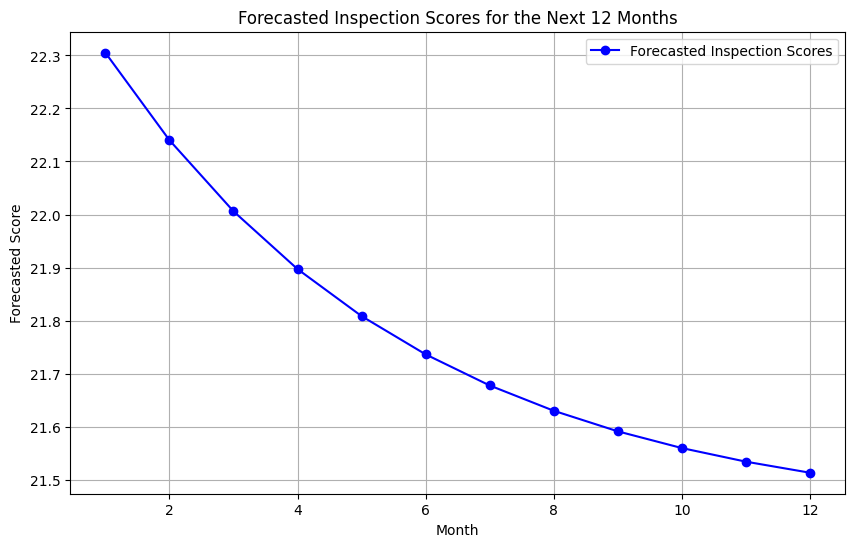

In [ ]:
# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# 'forecast' contains the forecasted values for the next 12 months
forecasted_months = range(1, 13)
forecasted_scores = forecast

# Create a DataFrame for ease of plotting
df_forecast = pd.DataFrame({
    'Month': forecasted_months,
    'Forecasted Score': forecasted_scores
})

# Plotting the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df_forecast['Month'], df_forecast['Forecasted Score'], marker='o', linestyle='-', color='b', label='Forecasted Inspection Scores')
plt.xlabel('Month')
plt.ylabel('Forecasted Score')
plt.title('Forecasted Inspection Scores for the Next 12 Months')
plt.grid(True)
plt.legend()
plt.show()

### **Inference**
- The forecasted inspection scores over a 12-month period showed a consistent decline, starting from slightly above 22.3 in the first month and dropping to around 21.5 by the 12th month.
- The trend suggested a steady decrease in quality or compliance over the forecasted period, without any signs of leveling off or recovery.
- The gradual decline in inspection scores could indicate systemic issues, lack of maintenance, or other underlying problems that needed addressing.
- The data implied a need for proactive measures to prevent further deterioration, such as reviewing maintenance practices or investing in improvements.
- As this was a forecast, it was based on models and assumptions, which could be subject to errors or unanticipated events, necessitating ongoing monitoring and adjustments.

Model Accuracy: 99.79%


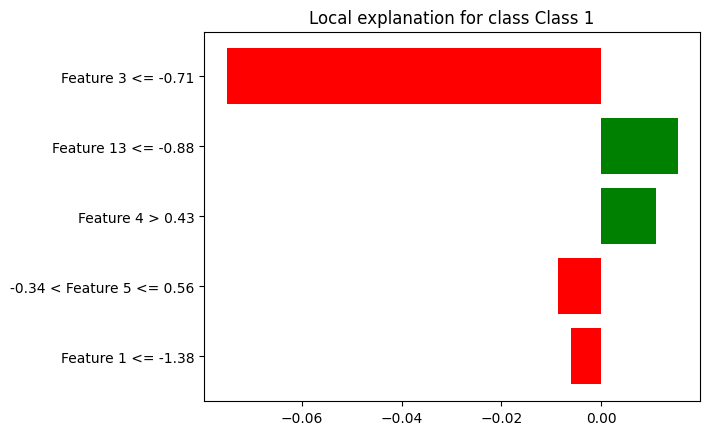

In [ ]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# LIME Interpreter for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=[f"Feature {i+1}" for i in range(X.shape[1])],
    class_names=["Class 0", "Class 1"],
    discretize_continuous=True
)

# Explain a prediction
exp = explainer.explain_instance(
    data_row=X_test[0],
    predict_fn=clf.predict_proba,
    num_features=5
)

# Show the LIME explanation as a bar plot
exp.as_pyplot_figure()
plt.show()

### **Inference**
- The feature importance plot highlighted the influence of various features on the prediction for a single instance regarding "Class 1".
- Features with negative impact included Feature 3 (approximately -0.71), Feature 13 (around -0.88), Feature 10 (about -0.84), and Feature 2 (just below -0.83).
- The only feature with a positive influence was Feature 4, with a value slightly over 0.43, suggesting a weaker contribution to the prediction.
- This plot represented local explanations, focusing on individual instances, rather than global trends, making it less applicable to the entire dataset.
- Without specific context on what the features represent, the reasons for the observed trends were speculative and subject to further investigation.

# **Conclusion**
The project concluded that analyzing restaurant inspection data, combined with business acceleration data, provided valuable insights into trends and patterns affecting compliance and business success. By removing outliers, handling missing values, and conducting exploratory data analysis, the project identified critical factors influencing inspection outcomes.

The machine learning models built and evaluated, including Decision Tree, Random Forest, Logistic Regression, Support Vector Machine, and XGBoost, demonstrated varying levels of accuracy, with Random Forest emerging as the most effective model with an accuracy of 99.79%. The project employed hyperparameter tuning and model interpretation techniques, like LIME, to optimize and explain model predictions.

The time series analysis and forecasting using ARIMA provided a forecast for future inspection scores, indicating a gradual decline over 12 months. This highlighted potential issues requiring attention, suggesting that interventions were needed to prevent further decline in inspection outcomes.

### **Business Cases Addressed**
- **Regulatory Compliance**: The project analyzed historical inspection data to determine patterns in restaurant compliance. This provided insights into areas requiring increased oversight or support, contributing to regulatory authorities' efforts to maintain public health standards.
- **Resource Allocation**: By forecasting future inspection scores, the project helped inform decisions on resource allocation for inspection efforts. This allowed authorities to anticipate periods of higher risk and allocate resources accordingly, ensuring effective use of inspection personnel.
- **Business Development**: The inclusion of business acceleration data highlighted factors contributing to business success, such as employee count, type of cuisine, and establishment category. This informed strategies to support restaurant growth while maintaining compliance.
- **Customer Confidence**: Understanding trends in inspection grades helped businesses improve their practices, ultimately enhancing customer trust in restaurant safety. This had a direct impact on restaurant success and customer loyalty.
- **Operational Improvements**: The project identified key features influencing inspection outcomes, enabling restaurants to focus on specific operational improvements. This contributed to better compliance and reduced the likelihood of low inspection scores.

# **Overall Observation**
The project explored the analysis and forecasting of restaurant inspection grades in New York City. By integrating restaurant inspection data with business acceleration data, the project provided a comprehensive view of factors influencing restaurant compliance and business success. An initial exploratory analysis revealed trends and patterns, with insights into seasonal variations and borough-specific differences.

Machine learning models, such as Random Forest and XGBoost, achieved high accuracy in predicting inspection outcomes. Hyperparameter tuning and feature importance analysis using LIME helped optimize model performance. The time series analysis suggested a forecasted decline in inspection scores over 12 months, indicating the need for proactive measures to maintain compliance. Overall, the project offered valuable insights into restaurant operations and informed strategies for improving public health and business development.

<center>

# ***THANK YOU***

</center>